In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from copy import copy
import statsmodels

In [2]:
df_weather = pd.read_csv("../data/csv/weather_data.csv",index_col="datetime",parse_dates=True)

In [3]:
image_dir_path = "../data/image/"

In [4]:
df_weather

temperature  precipitation  sunshine  wind_speed  \
datetime                                                                
2002-11-29 01:00:00          9.0            0.0       NaN         4.7   
2002-11-29 02:00:00          8.4            0.0       NaN         3.8   
2002-11-29 03:00:00          8.1            0.0       NaN         4.0   
2002-11-29 04:00:00          7.9            0.0       NaN         2.6   
2002-11-29 05:00:00          6.9            0.0       NaN         2.9   
...                          ...            ...       ...         ...   
2022-11-28 20:00:00         13.2            0.0       0.0         1.4   
2022-11-28 21:00:00         13.2            0.0       0.0         1.9   
2022-11-28 22:00:00         13.4            0.0       0.0         1.7   
2022-11-28 23:00:00         13.3            0.0       0.0         2.0   
2022-11-29 00:00:00         13.0            0.0       0.0         0.4   

                    wind_direction  pressure  humidity  weather cloud  
datetime                                                               
2002-11-29 01:00:00             北西    1019.6      39.0      NaN   NaN  
2002-11-29 02:00:00            北北西    1020.0      40.0      NaN   NaN  
2002-11-29 03:00:00            北北西    1020.1      41.0      1.0    0+  
2002-11-29 04:00:00            北北西    1020.3      41.0      NaN   NaN  
2002-11-29 05:00:00            北北東    1020.8      47.0      NaN   NaN  
...                            ...       ...       ...      ...   ...  
2022-11-28 20:00:00              西    1023.9      69.0      NaN   NaN  
2022-11-28 21:00:00             北西    1023.4      71.0      4.0    10  
2022-11-28 22:00:00            西北西    1023.4      70.0      NaN   NaN  
2022-11-28 23:00:00             北西    1023.0      72.0      NaN   NaN  
2022-11-29 00:00:00             北西    1022.0      75.0      NaN   NaN  

[175320 rows x 9 columns]

In [121]:
# AorYが年、Qが四半期、SMが15日と月末、Mが月末、Wが週（日曜開始）、Bが平日、Dが毎日
# 接頭語Bを付けると平日のみ集計、接尾語Sを付けると表示が開始日になる
df_weather.resample(rule = "YS").mean()["temperature"]

datetime
2002-01-01     7.459418
2003-01-01    16.053322
2004-01-01    17.363160
2005-01-01    16.253881
2006-01-01    16.452683
2007-01-01    17.028459
2008-01-01    16.451480
2009-01-01    16.732705
2010-01-01    16.950285
2011-01-01    16.516689
2012-01-01    16.322735
2013-01-01    17.137911
2014-01-01    16.640342
2015-01-01    16.452032
2016-01-01    16.466587
2017-01-01    15.873116
2018-01-01    16.835776
2019-01-01    16.494975
2020-01-01    16.553683
2021-01-01    16.667100
2022-01-01    17.269218
Freq: AS-JAN, Name: temperature, dtype: float64

# 移動平均とトレンド

In [8]:
name = "moving_average"

In [9]:
element = "temperature"

In [49]:
# 計算方法
# centerを付けると結果が中央になる。つけないと後ろに寄る。
# min_periodsを付けると欠損があっても数が足りていれば対応してくれる
print("element:",element)
df_weather[element].rolling(24,min_periods=20,center=True).mean()

element: temperature


datetime
2002-11-29 01:00:00   NaN
2002-11-29 02:00:00   NaN
2002-11-29 03:00:00   NaN
2002-11-29 04:00:00   NaN
2002-11-29 05:00:00   NaN
                       ..
2022-11-28 20:00:00   NaN
2022-11-28 21:00:00   NaN
2022-11-28 22:00:00   NaN
2022-11-28 23:00:00   NaN
2022-11-29 00:00:00   NaN
Name: temperature, Length: 175320, dtype: float64

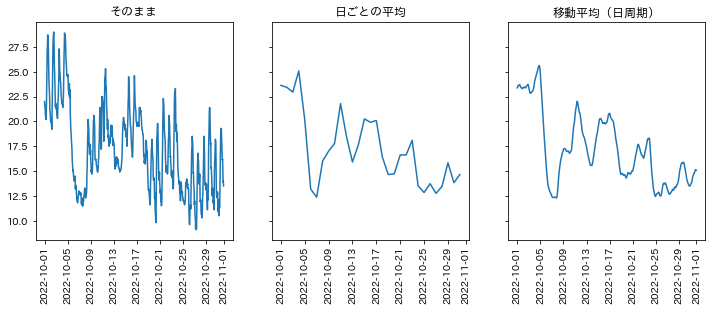

In [50]:
# 移動平均（日）
period = "2022-10"
span = "day"

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4),sharey=True)

# そのまま
axes[0].plot(df_weather.loc[period,element])
axes[0].set_title("そのまま")

# 日ごとの平均
mean_by_day = df_weather[element].resample(rule="D").mean().loc[period]
axes[1].plot(mean_by_day)
axes[1].set_title("日ごとの平均")

# 移動平均（日周期）
rolling_mean_day = df_weather[element].rolling(24,min_periods=20,center=True).mean().loc[period]
axes[2].plot(rolling_mean_day)
axes[2].set_title("移動平均（日周期）")

# x軸向き修正
for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
# file_path = f"{image_dir_path}{name}_{element}_{span}_{period}.png"
# plt.savefig(file_path)
plt.show()

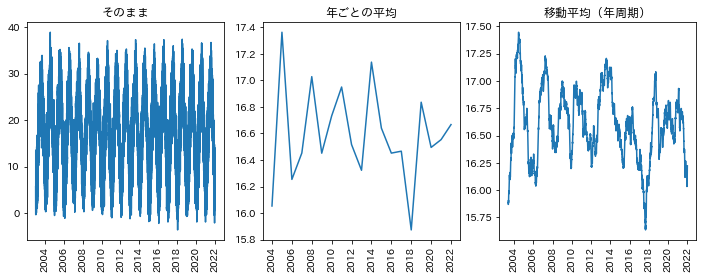

In [51]:
# 移動平均（年）
start = "2003"
end = "2021"
span = "year"

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4))

# そのまま
axes[0].plot(df_weather.loc[start:end,element])
axes[0].set_title("そのまま")

# 年ごとの平均
mean_by_day = df_weather[element].resample(rule="Y").mean().loc[start:end]
axes[1].plot(mean_by_day)
axes[1].set_title("年ごとの平均")

# 移動平均（年周期）
rolling_mean_day = df_weather[element].rolling(24*365,min_periods=24*364,center=True).mean().loc[start:end]
axes[2].plot(rolling_mean_day)
axes[2].set_title("移動平均（年周期）")

# x軸向き修正
for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
# file_path = f"{image_dir_path}{name}_{element}_{span}_{start}_{end}.png"
# plt.savefig(file_path)
plt.show()

# 短期的変動

In [ ]:
name = "diff"

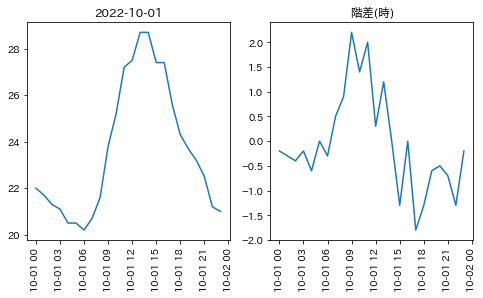

In [18]:
# 階差（時）
period = "2022-10-01"
diff = 1
span = "hour"

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(8,4))

axes[0].plot(df_weather.loc[period,element])
axes[0].set_title(period)
axes[1].plot(df_weather[element].diff(diff).loc[period])
axes[1].set_title("階差(時)")

for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
# file_path = f"{image_dir_path}{name}_{element}_{span}_{period}.png"
# plt.savefig(file_path)
plt.show()

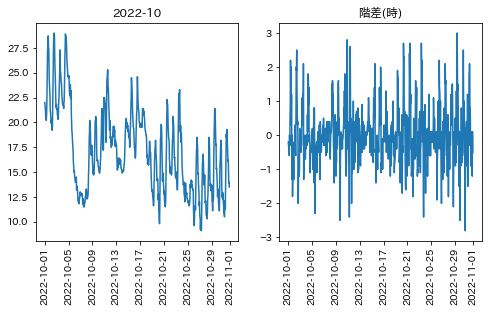

In [19]:
# 階差（時）
period = "2022-10"
diff = 1
span = "hour"

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(8,4))

axes[0].plot(df_weather.loc[period,element])
axes[0].set_title(period)
axes[1].plot(df_weather[element].diff(diff).loc[period])
axes[1].set_title("階差(時)")

for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
# file_path = f"{image_dir_path}{name}_{element}_{span}_{period}.png"
# plt.savefig(file_path)
plt.show()

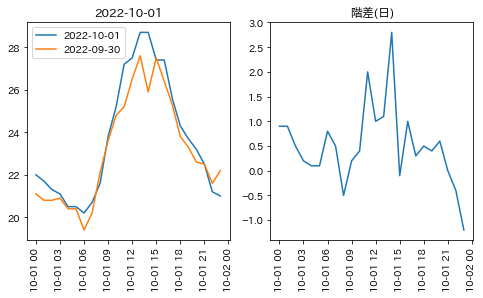

In [20]:
# 階差（日）
period = "2022-10-01"
pre_period = "2022-09-30"
diff = 24
span = "day"

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4))

# 当日
axes[0].plot(df_weather.loc[period,element])
# 前日（軸を当日に合わる）
date = df_weather.loc[period,element].index
value = df_weather.loc[pre_period,element].reset_index()[element]
axes[0].plot(date,value)
axes[0].legend([period,pre_period])
axes[0].set_title(period)

# 階差
axes[1].plot(df_weather[element].diff(diff).loc[period])
axes[1].set_title("階差(日)")

for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
# file_path = f"{image_dir_path}{name}_{element}_{span}_{period}.png"
# plt.savefig(file_path)  
plt.show()

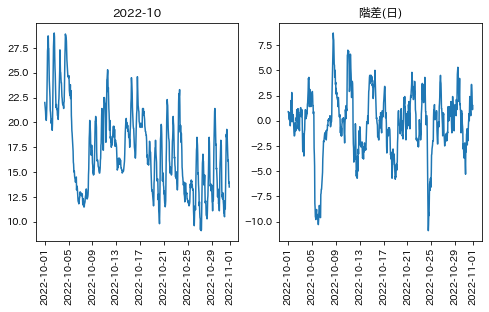

In [245]:
# 階差（日）
# 前日を描画してもいいけど見づらい
period = "2022-10"
# pre_period_s = "2022-09-30"
# pre_period_e = "2022-10-30"
diff = 24
span = "day"

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4))

# 当日
axes[0].plot(df_weather.loc[period,element])
# # 前日（軸を当日に合わる）
# date = df_weather.loc[period,element].index
# value = df_weather.loc[pre_period_s:pre_period_e,element].reset_index()[element]
# axes[0].plot(date,value)
axes[0].set_title(period)

# 階差
axes[1].plot(df_weather[element].diff(diff).loc[period])
axes[1].set_title("階差(日)")

for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
# file_path = f"{image_dir_path}{name}_{element}_{span}_{period}.png"
# plt.savefig(file_path)  
plt.show()

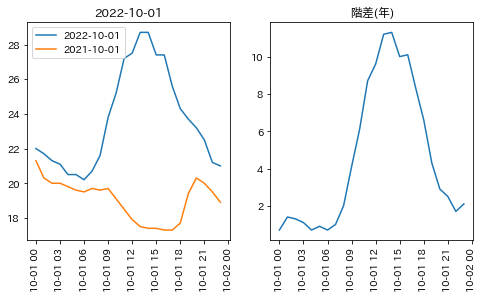

In [21]:
# 階差（年）
period = "2022-10-01"
pre_period = "2021-10-01"
diff = 24*365
span = "year"

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(8,4))

axes[0].plot(df_weather.loc[period,element])
date = df_weather.loc[period,element].index
value = df_weather.loc[pre_period,element].reset_index()[element]
axes[0].plot(date,value)
axes[0].legend([period,pre_period])
axes[0].set_title(period)

axes[1].plot(df_weather[element].diff(diff).loc[period])
axes[1].set_title("階差(年)")

for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
# file_path = f"{image_dir_path}{name}_{element}_{span}_{period}.png"
# plt.savefig(file_path)  
plt.show()

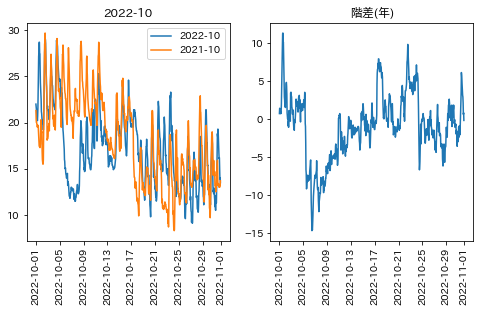

In [22]:
# 階差（年）
period = "2022-10"
pre_period = "2021-10"
diff = 24*365
span = "year"

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(8,4))

axes[0].plot(df_weather.loc[period,element])
date = df_weather.loc[period,element].index
value = df_weather.loc[pre_period,element].reset_index()[element]
axes[0].plot(date,value)
axes[0].legend([period,pre_period])

axes[0].set_title(period)
axes[1].plot(df_weather[element].diff(diff).loc[period])
axes[1].set_title("階差(年)")

for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
# file_path = f"{image_dir_path}{name}_{element}_{span}_{period}.png"
# plt.savefig(file_path)  
plt.show()

# スペクトル解析

In [55]:
name = "spectrum"

In [56]:
# フーリエ変換
# 参考：https://nykergoto.hatenablog.jp/entry/2019/07/09/FFT_%E3%82%92%E4%BD%BF%E3%81%A3%E3%81%9F%E6%99%82%E7%B3%BB%E5%88%97%E3%83%87%E3%83%BC%E3%82%BF%E8%A7%A3%E6%9E%90

period = "2021"
span = "year"
n_samples = df_weather.loc[period,element].shape[0]
sampling_rate = 24

z = np.fft.fftn(df_weather.loc[period,element].values)
freq = np.fft.fftfreq(n_samples, d=1 / sampling_rate)

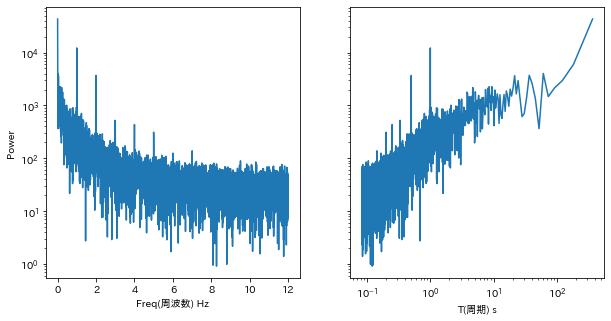

In [57]:
# 真面目に
fig, axes = plt.subplots(figsize=(10, 5), ncols=2, sharey=True)
ax = axes[0]
ax.plot(freq[1:int(n_samples / 2)], abs(z[1:int(n_samples / 2)]))
ax.set_yscale('log')
ax.set_xlabel('Freq(周波数) Hz')
ax.set_ylabel('Power')

# 周波数 f → 周期 T に直して表示する
# 周期は fT = 1 を満たすので単に逆数にすれば良い
ax = axes[1]
ax.plot(1 / freq[1:int(n_samples / 2)], abs(z[1:int(n_samples / 2)]))
ax.set_yscale('log')
ax.set_xlabel('T(周期) s')
ax.set_xscale('log')

# file_path = f"{image_dir_path}{name}_{element}_{span}_{period}.png"
# plt.savefig(file_path)  
plt.show()

In [58]:
# 1年周期と1日周期と、半年、2カ月、半日、36.5日、21.5日、…
fft_pow_df = pd.DataFrame([1 / freq[1:int(n_samples / 2)], np.log10(abs(z[1:int(n_samples / 2)]))], index=['T', 'log10_power']).T
fft_pow_df.sort_values('log10_power', ascending=False).head(10)

T  log10_power
0    365.000000     4.634266
364    1.000000     4.086907
1    182.500000     3.776244
5     60.833333     3.604892
9     36.500000     3.569699
729    0.500000     3.566312
16    21.470588     3.562671
14    24.333333     3.469919
2    121.666667     3.469673
8     40.555556     3.411543

In [59]:
# 階差だとどうなる？
period = "2021"
span = "year"
n_samples = df_weather.loc[period,element].shape[0]
sampling_rate = 24

z = np.fft.fftn(df_weather[element].diff().loc[period].values)
freq = np.fft.fftfreq(n_samples, d=1 / sampling_rate)

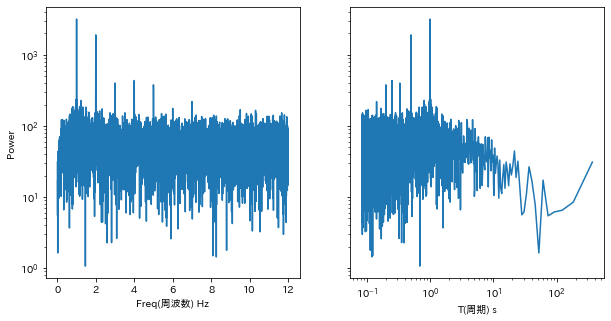

In [60]:
# 真面目に
fig, axes = plt.subplots(figsize=(10, 5), ncols=2, sharey=True)
ax = axes[0]
ax.plot(freq[1:int(n_samples / 2)], abs(z[1:int(n_samples / 2)]))
ax.set_yscale('log')
ax.set_xlabel('Freq(周波数) Hz')
ax.set_ylabel('Power')

# 周波数 f → 周期 T に直して表示する
# 周期は fT = 1 を満たすので単に逆数にすれば良い
ax = axes[1]
ax.plot(1 / freq[1:int(n_samples / 2)], abs(z[1:int(n_samples / 2)]))
ax.set_yscale('log')
ax.set_xlabel('T(周期) s')
ax.set_xscale('log')

# file_path = f"{image_dir_path}{name}_diff_{element}_{span}_{period}.png"
# plt.savefig(file_path)  
plt.show()

In [61]:
# 1日、半日、1/4日、1/3日、1/5日…
fft_pow_df = pd.DataFrame([1 / freq[1:int(n_samples / 2)], np.log10(abs(z[1:int(n_samples / 2)]))], index=['T', 'log10_power']).T
fft_pow_df.sort_values('log10_power', ascending=False).head(10)

T  log10_power
364   1.000000     3.503654
729   0.500000     3.280313
728   0.500686     2.655736
1459  0.250000     2.638774
365   0.997268     2.635559
1095  0.333029     2.602303
1093  0.333638     2.595719
730   0.499316     2.589092
1823  0.200110     2.577323
1825  0.199890     2.512993

# (偏)自己相関

In [63]:
# 参考：https://qiita.com/MToyokura/items/8a58cb43e634e6421834
name = "autocorrelation"

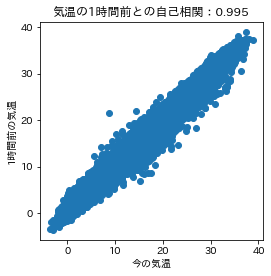

In [89]:

plt.figure(figsize=(4,4))
a = df_weather[element][:-1].values
b = df_weather[element][1:].values

c = pd.DataFrame({
    "lag_0":a,
    "lag_1":b
})
corr = c.corr().iloc[0,1].round(3)
plt.scatter(a,b)
plt.xlabel("今の気温")
plt.ylabel("1時間前の気温")
plt.title(f"気温の1時間前との自己相関：{corr}")

# file_path = f"{image_dir_path}{name}_{element}.png"
# plt.savefig(file_path)
plt.show()

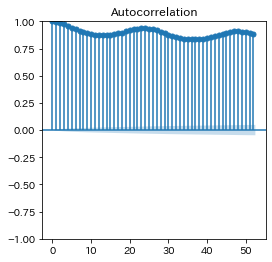

In [67]:
# 自己相関関数のグラフ
# 欠損があると計算できないっぽい
period = "2021"
start = "2003"
end = "2018"
# acf = sm.tsa.stattools.acf(df_weather[element].loc[start:end],nlags=100)

fig = plt.figure(figsize=(4,4))

ax1 = fig.add_subplot(111)
sm.graphics.tsa.plot_acf(df_weather[element].loc[start:end],ax=ax1)
# ax1.set_ylim(0.1,1.0)

# file_path = f"{image_dir_path}{name}_{element}_{start}_{end}.png"
# plt.savefig(file_path)  

plt.show()

C:\Users\doubl\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


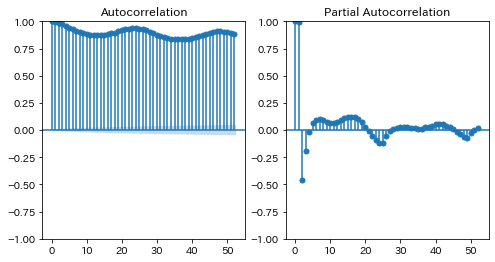

In [68]:
# 自己相関関数と偏自己相関関数のグラフ
period = "2021"
start = "2003"
end = "2018"
# acf = sm.tsa.stattools.acf(df_weather[element].loc[start:end],nlags=100)

fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(121)
sm.graphics.tsa.plot_acf(df_weather[element].loc[start:end], alpha=0.05, ax=ax1)

ax2 = fig.add_subplot(122)
sm.graphics.tsa.plot_pacf(df_weather[element].loc[start:end], alpha=0.05,ax=ax2)

# file_path = f"{image_dir_path}{name}_partial_{element}_{start}_{end}.png"
# plt.savefig(file_path)  

plt.show()

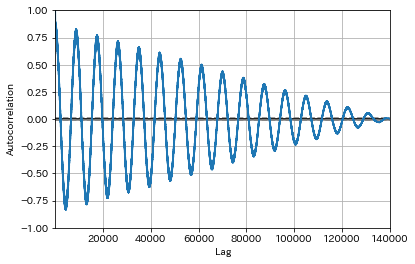

In [69]:
# pandasの場合
start = "2003"
end = "2018"
pd.plotting.autocorrelation_plot(df_weather.loc[start:end,element])
# file_path = f"{image_dir_path}{name}_pandas_{element}_{start}_{end}.png"
# plt.savefig(file_path)  
plt.show()

C:\Users\doubl\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


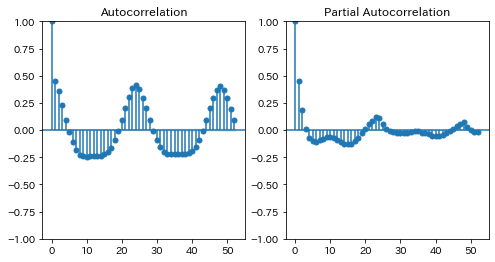

In [70]:
# 階差（時）を利用する場合
start = "2003"
end = "2018"
lag = 1

fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(121)
sm.graphics.tsa.plot_acf(df_weather[element].diff(lag).loc[start:end],ax=ax1)

ax2 = fig.add_subplot(122)
sm.graphics.tsa.plot_pacf(df_weather[element].diff(lag).loc[start:end],ax=ax2)

# file_path = f"{image_dir_path}{name}_diff_{element}_{start}_{end}.png"
# plt.savefig(file_path)  

plt.show()

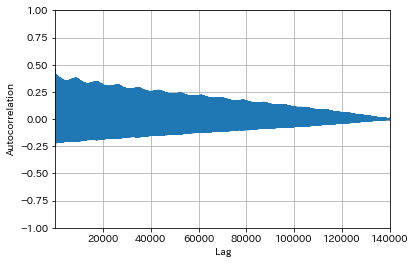

In [453]:
# pandasの場合
start = "2003"
end = "2018"
lag = 1
pd.plotting.autocorrelation_plot(df_weather[element].diff(lag).loc[start:end])
plt.show()

C:\Users\doubl\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


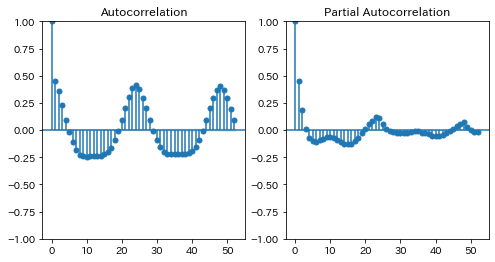

In [451]:
# 階差（日）を利用する場合
start = "2003"
end = "2018"
lag = 24

fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(121)
sm.graphics.tsa.plot_acf(df_weather[element].diff(lag).loc[start:end],ax=ax1)

ax2 = fig.add_subplot(122)
sm.graphics.tsa.plot_pacf(df_weather[element].diff(lag).loc[start:end],ax=ax2)

plt.show()

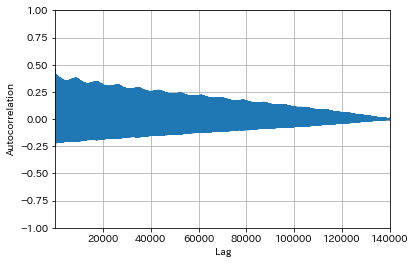

In [453]:
# pandasの場合
start = "2003"
end = "2018"
lag = 24
pd.plotting.autocorrelation_plot(df_weather[element].diff(lag).loc[start:end])
plt.show()

C:\Users\doubl\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


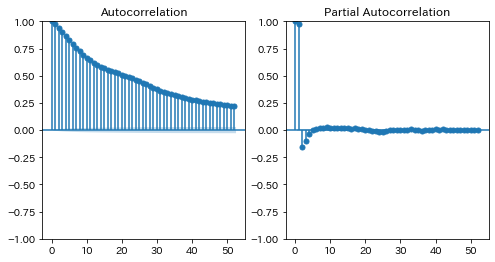

In [456]:
# 階差（年）を利用する場合
start = "2004"
end = "2018"
lag = 24*365

fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(121)
sm.graphics.tsa.plot_acf(df_weather[element].diff(lag).loc[start:end],ax=ax1)

ax2 = fig.add_subplot(122)
sm.graphics.tsa.plot_pacf(df_weather[element].diff(lag).loc[start:end],ax=ax2)

plt.show()

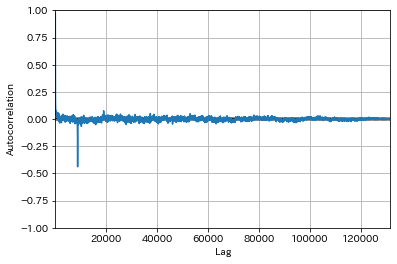

In [457]:
# pandasの場合
start = "2004"
end = "2018"
lag = 24*365
pd.plotting.autocorrelation_plot(df_weather[element].diff(lag).loc[start:end])
plt.show()

# 相互相関

In [127]:
from matplotlib import mlab
from sklearn.preprocessing import StandardScaler
name = "cross correlation"

In [128]:
element1 = "temperature"
element2 = "humidity"
period = "2014"
maxlags = 24

ss = StandardScaler()
df_weather_ss = copy(df_weather[[element1,element2]])
df_weather_ss[[element1,element2]] = ss.fit_transform(df_weather_ss[[element1,element2]])

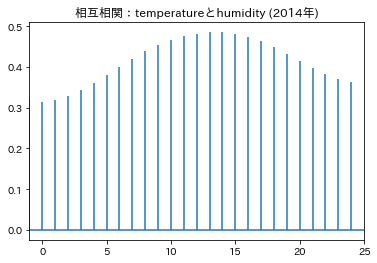

In [129]:
xcor_value = plt.xcorr(df_weather_ss[element1].loc[period], 
                       df_weather_ss[element2].loc[period],
                       detrend=mlab.detrend_none, 
                       maxlags=maxlags)
plt.xlim(-1,maxlags+1)
plt.title(f"相互相関：{element1}と{element2} ({period}年)")

# file_path = f"{image_dir_path}{name}_{element1}_{element2}_{period}.png"
# plt.savefig(file_path)  
plt.show()

# 季節調整

In [10]:
# 2つ以上の季節成分を取り出す手法って諸説じゃない？
# 日周期を時平均を使って取り出す→年周期を日平均（または日の移動平均）を使って取り出す
# （年＋日）周期を日平均を使って取り出す→（年＋日）周期から時平均を使って年周期と日周期を分ける

In [37]:
name = "seasonal_adjustment"

In [38]:
# 元データ - 時平均　だけ 

In [39]:
# 季節成分を取り出す
# 1日周期
start = "2021-10-01"
end = "2021-10-07"
days = int(df_weather.shape[0]/24)

hour_mean = []
for hour in df_weather.index.hour.unique():
    condition = df_weather.index.hour == hour
    mean = df_weather.loc[condition,element].mean()
    hour_mean.append([hour,mean])
    
hour_mean = np.array(hour_mean)

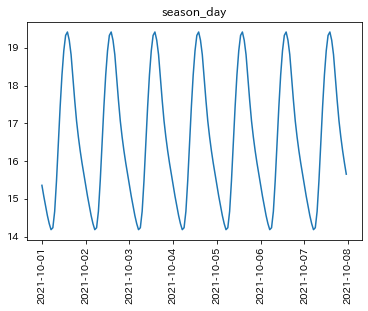

In [40]:
# くり返して完成
type_ = "season_day"
days = int(df_weather.shape[0]/24)
season = pd.DataFrame(np.tile(hour_mean[:,1],days),index=df_weather.index)
plt.plot(season[start:end])
plt.xticks(rotation=90)
plt.title(type_)

file_path = f"{image_dir_path}{name}_{type_}_{element}_{start}_{end}.png"
plt.savefig(file_path)     
plt.show()

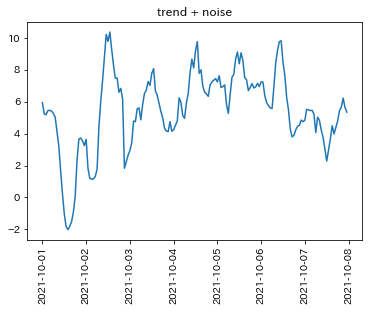

In [41]:
# トレンド＋ノイズ = 元データ - 季節成分
type_ = "trend + noise"
trend_noise =  df_weather[element] - season.values.reshape(-1)
plt.plot(trend_noise[start:end])
plt.xticks(rotation=90)
plt.title(type_)

file_path = f"{image_dir_path}{name}_{type_}_{element}_{start}_{end}.png"
plt.savefig(file_path)     
plt.show()

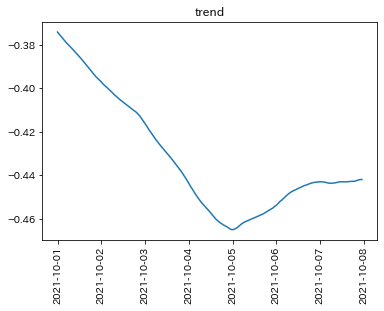

In [42]:
# トレンド
type_ = "trend"
span = 24*365

trend = trend_noise.rolling(span,min_periods=24*364,center=True).mean()
plt.plot(trend[start:end])
plt.xticks(rotation=90)
plt.title(type_)

file_path = f"{image_dir_path}{name}_{type_}_{element}_{start}_{end}.png"
plt.savefig(file_path)     
plt.show()

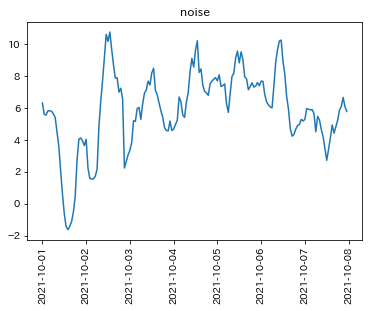

In [43]:
# ノイズ
type_ = "noise"
noise = trend_noise - trend
plt.plot(noise[start:end])
plt.xticks(rotation=90)
plt.title(type_)

file_path = f"{image_dir_path}{name}_{type_}_{element}_{start}_{end}.png"
plt.savefig(file_path)     
plt.show()

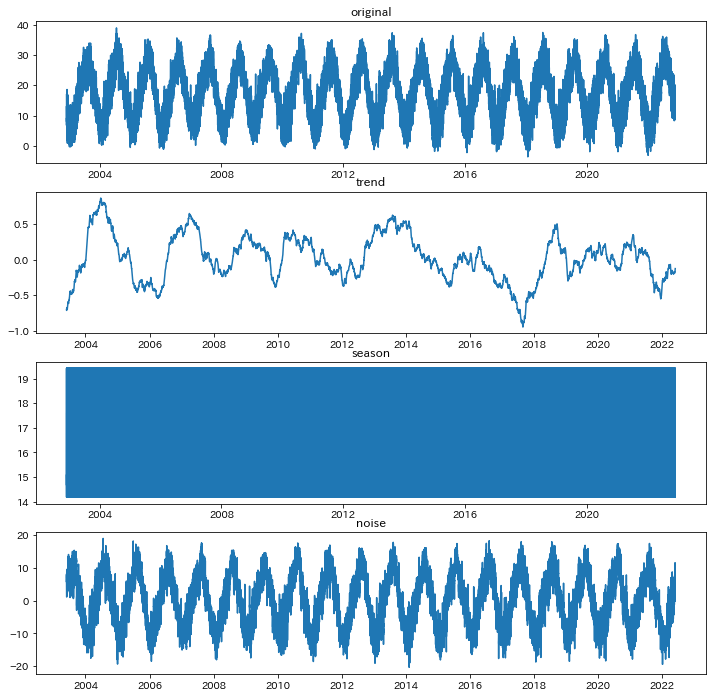

In [44]:
# 並べて表示(軸調整なし)
type_ = "all"
period = "all"
graph = {
    "original":df_weather[element],
    "trend":trend,
    "season":season,
    "noise":noise
}

fig,axes = plt.subplots(nrows=4,ncols=1,figsize=(12,12))

for num,(key,value) in enumerate(graph.items()):
    axes[num].plot(value)
    axes[num].set_title(key)

# file_path = f"{image_dir_path}{name}_{type_}_{element}_{period}.png"
# plt.savefig(file_path)
plt.show()

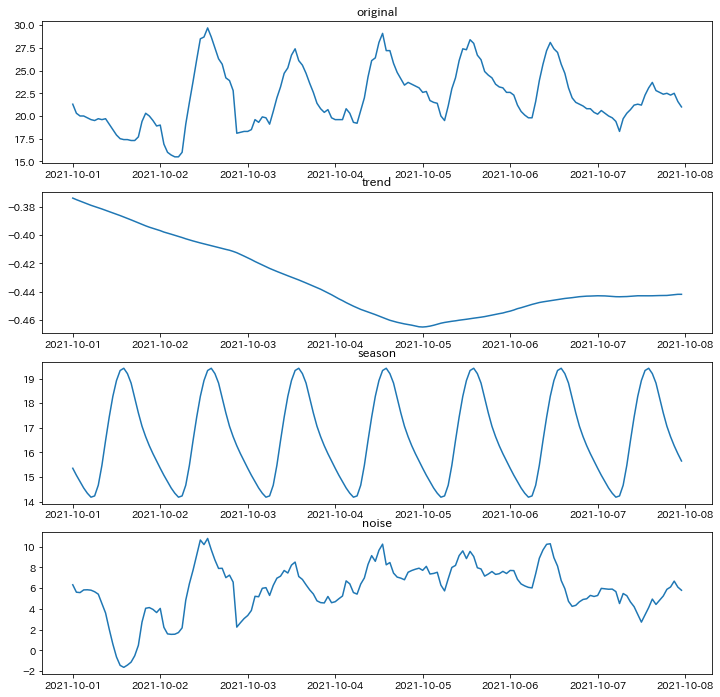

In [46]:
# 並べて表示(軸調整なし、1カ月)
type_ = "all"
graph = {
    "original":df_weather[element],
    "trend":trend,
    "season":season,
    "noise":noise
}

fig,axes = plt.subplots(nrows=4,ncols=1,figsize=(12,12))

for num,(key,value) in enumerate(graph.items()):
    axes[num].plot(value[start:end])
    axes[num].set_title(key)

# file_path = f"{image_dir_path}{name}_{type_}_{element}_{start}_{end}.png"
# plt.savefig(file_path)
plt.show()

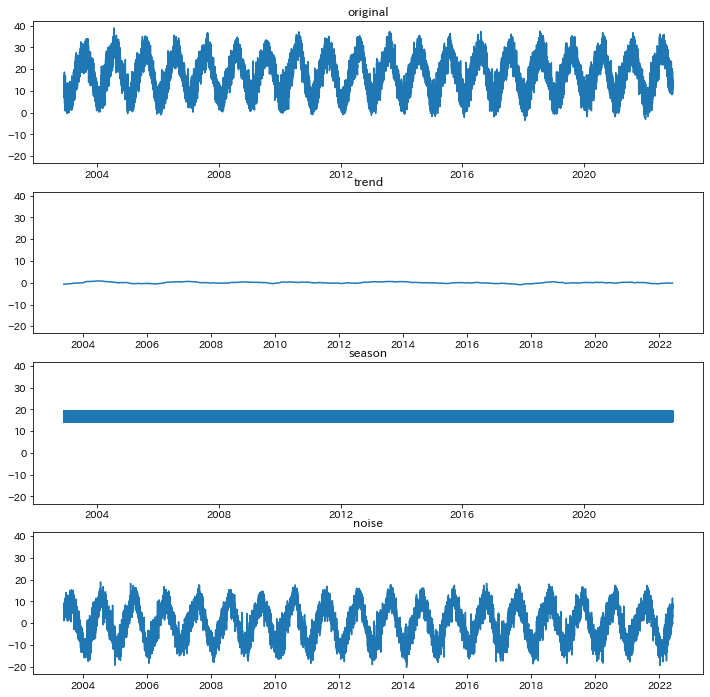

In [261]:
# 並べて表示(リアル表示)
graph = {
    "original":df_weather[element],
    "trend":trend,
    "season":season,
    "noise":noise,
}

fig,axes = plt.subplots(nrows=4,ncols=1,sharey="all",figsize=(12,12))

for num,(key,value) in enumerate(graph.items()):
    axes[num].plot(value)
    axes[num].set_title(key)

plt.show()

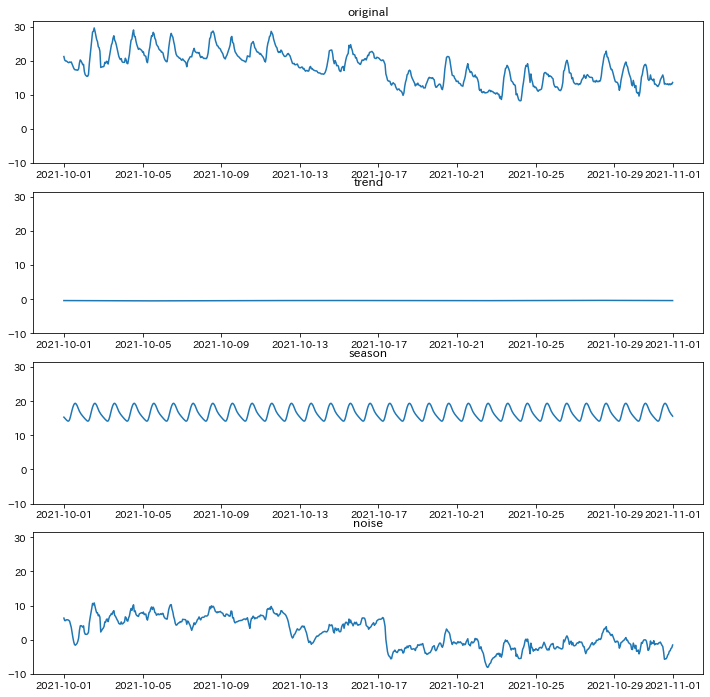

In [262]:
# 並べて表示(リアル表示、1カ月)
graph = {
    "original":df_weather[element],
    "trend":trend,
    "season":season,
    "noise":noise,
}

fig,axes = plt.subplots(nrows=4,ncols=1,sharey="all",figsize=(12,12))

for num,(key,value) in enumerate(graph.items()):
    axes[num].plot(value[start:end])
    axes[num].set_title(key)

plt.show()

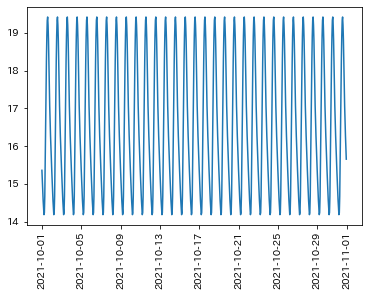

In [281]:
# 季節成分を取り出す
# 1日周期

start = "2021-10-01"
end = "2021-10-31"
days = int(df_weather.shape[0]/24)
years = int(df_weather.shape[0]/(24*365))

# 平均の計算
hour_mean = []
for hour in df_weather.index.hour.unique():
    condition = df_weather.index.hour == hour
    mean = df_weather.loc[condition,element].mean()
    hour_mean.append([hour,mean])
    
hour_mean = np.array(hour_mean)

# くり返して完成
season_day = pd.DataFrame(np.tile(hour_mean[:,1],days),index=df_weather.index)
plt.plot(season_day[start:end])
plt.xticks(rotation=90)
plt.show()

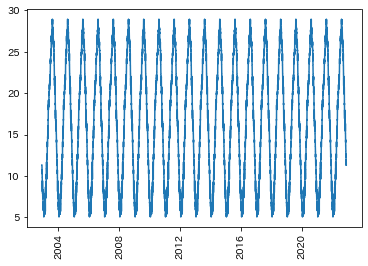

In [367]:
# 季節成分を取り出す
# 1年(うるう補正あり)周期

year_mean = []
for month in df_weather.index.month.unique():
    for day in df_weather.index.day.unique():
        condition = (df_weather.index.month == month) & (df_weather.index.day == day)
        mean = df_weather.loc[condition,element].mean()
        year_mean.append([month,day,mean])
    
year_mean = np.array(year_mean)
year_mean = pd.DataFrame(year_mean,columns=["month","day","mean"]).dropna().sort_values(["month","day"]).reset_index(drop=True)

# くり返して完成
df_weather_copy = copy(df_weather)
df_weather_copy["month"] = df_weather_copy.index.month
df_weather_copy["day"] = df_weather_copy.index.day
df_weather_copy["datetime"] = df_weather_copy.index
df_weather_copy2 = pd.merge(df_weather_copy,year_mean,on=["month","day"],how="left")
season_year = df_weather_copy2.set_index("datetime").drop(df_weather_copy2.columns[:11],axis=1)

plt.plot(season_year)
plt.xticks(rotation=90)
plt.show()

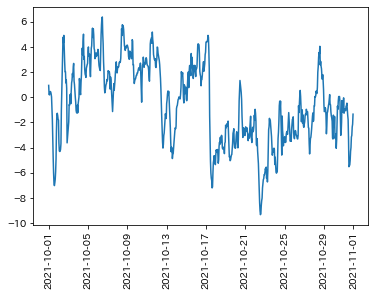

In [387]:
# トレンド＋ノイズ = 元データ - 季節成分

trend_noise =  df_weather[element] - season_day.values.reshape(-1) - season_year.values.reshape(-1) + df_weather[element].mean()
plt.plot(trend_noise[start:end])
plt.xticks(rotation=90)
plt.show()

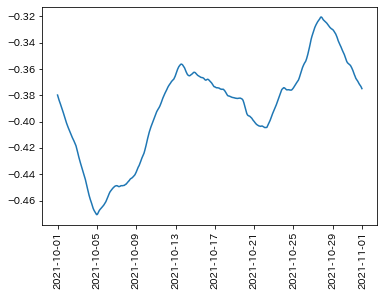

In [388]:
# トレンド
span = 24*365

trend = trend_noise.rolling(span,min_periods=24*364,center=True).mean()
plt.plot(trend[start:end])
plt.xticks(rotation=90)
plt.show()

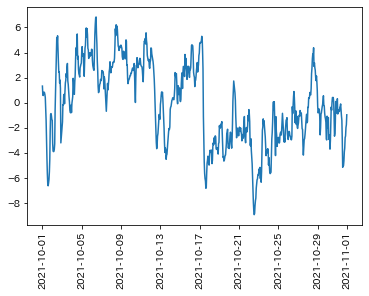

In [389]:
# ノイズ
noise = trend_noise - trend
plt.plot(noise[start:end])
plt.xticks(rotation=90)
plt.show()

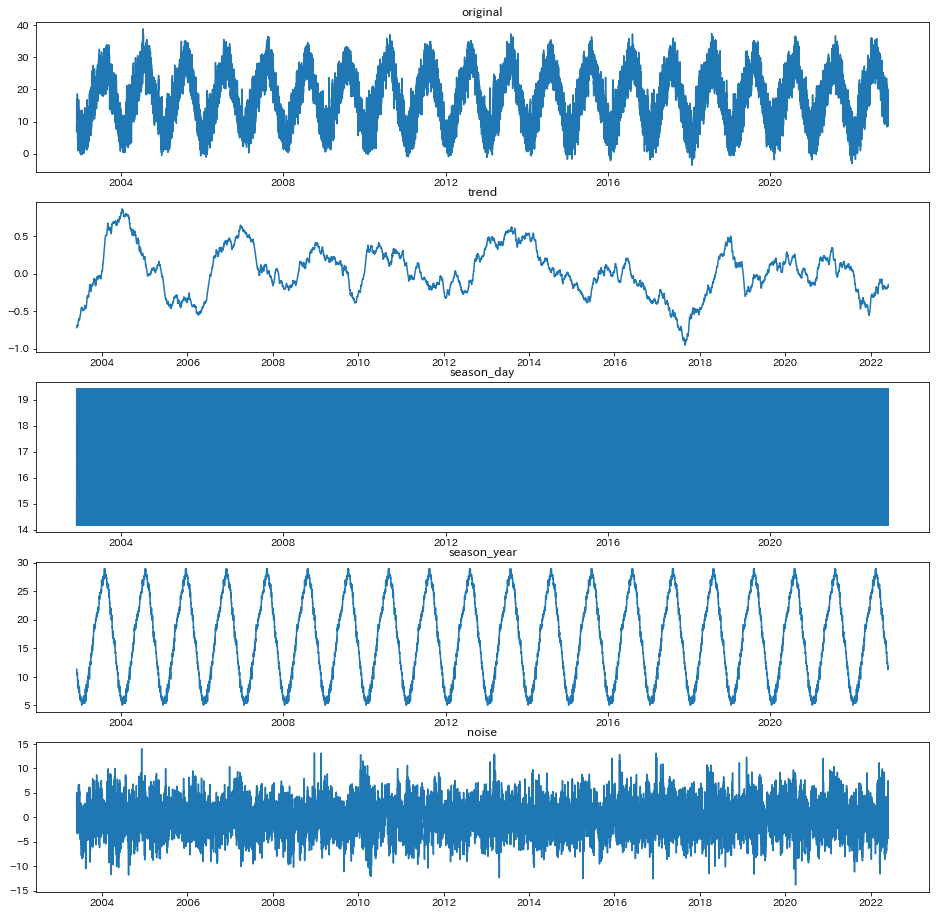

In [394]:
# 並べて表示(軸調整なし)
graph = {
    "original":df_weather[element],
    "trend":trend,
    "season_day":season_day,
    "season_year":season_year,
    "noise":noise
}

nrows = len(graph)
fig,axes = plt.subplots(nrows=nrows,ncols=1,figsize=(16,16))

for num,(key,value) in enumerate(graph.items()):
    axes[num].plot(value)
    axes[num].set_title(key)

plt.show()

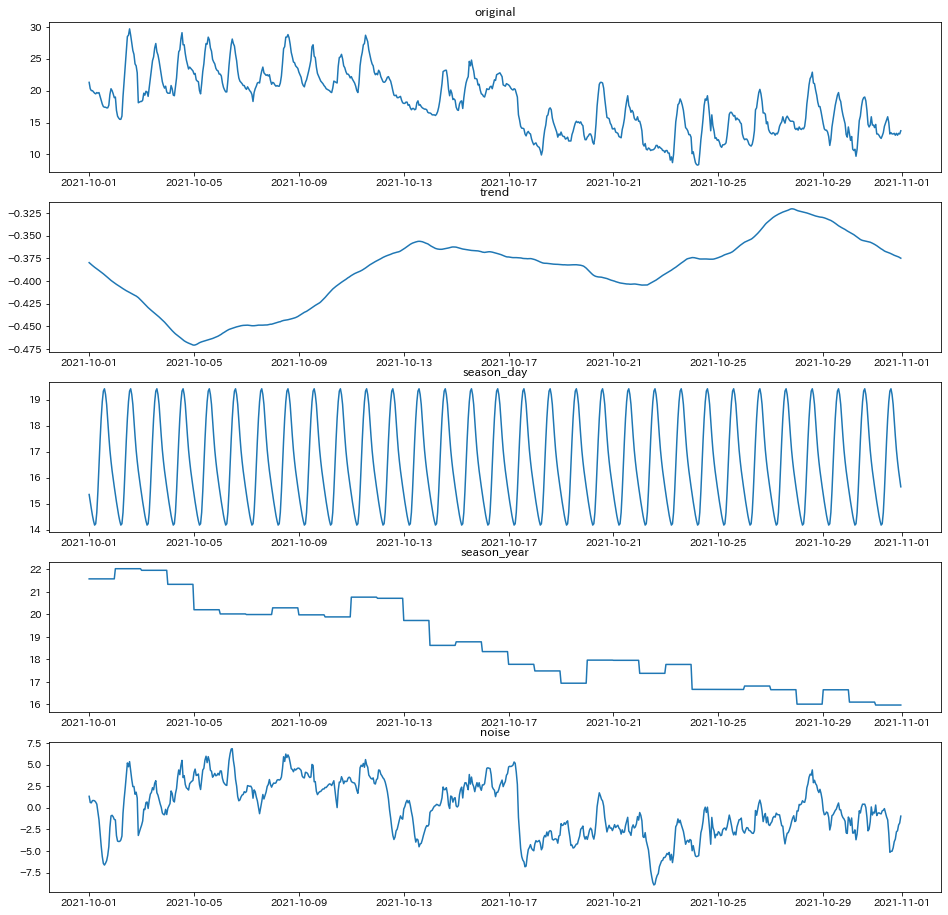

In [395]:
# 並べて表示(軸調整なし、1カ月)
graph = {
    "original":df_weather[element],
    "trend":trend,
    "season_day":season_day,
    "season_year":season_year,
    "noise":noise
}

nrows = len(graph)
fig,axes = plt.subplots(nrows=nrows,ncols=1,figsize=(16,16))

for num,(key,value) in enumerate(graph.items()):
    axes[num].plot(value[start:end])
    axes[num].set_title(key)

plt.show()

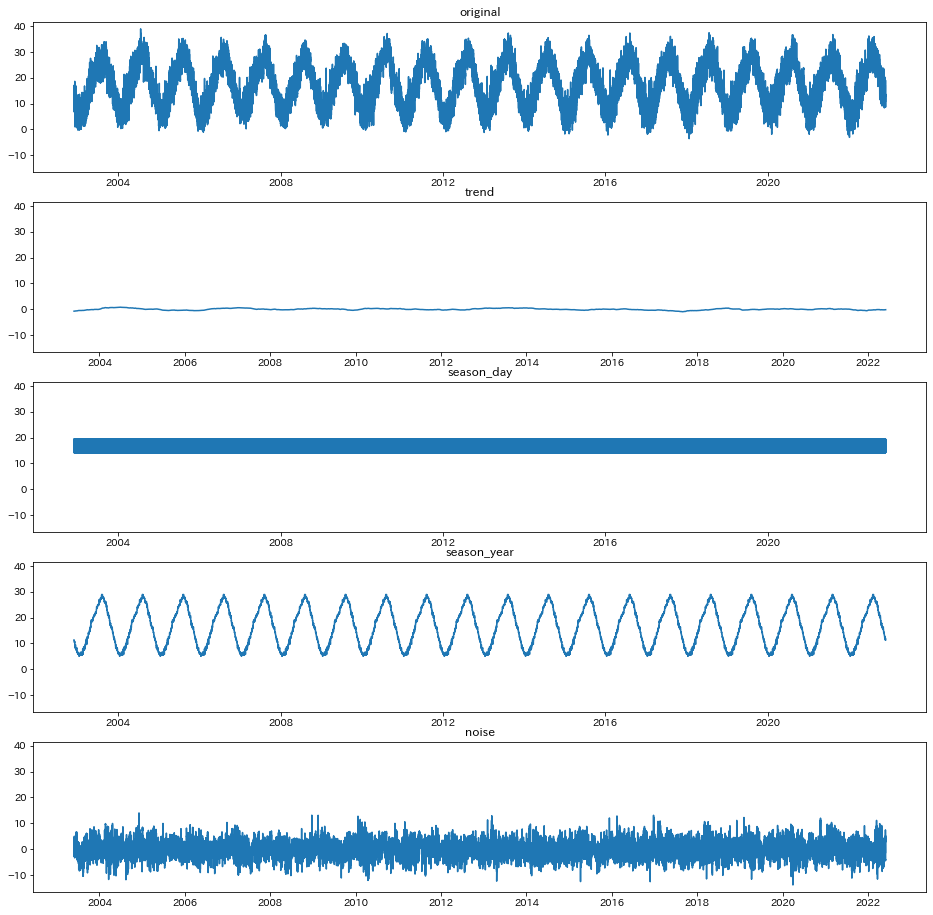

In [399]:
# 並べて表示(リアル表示)
graph = {
    "original":df_weather[element],
    "trend":trend,
    "season_day":season_day,
    "season_year":season_year,
    "noise":noise
}

nrows = len(graph)
fig,axes = plt.subplots(nrows=nrows,ncols=1,sharey="all",figsize=(16,16))

for num,(key,value) in enumerate(graph.items()):
    axes[num].plot(value)
    axes[num].set_title(key)

plt.show()

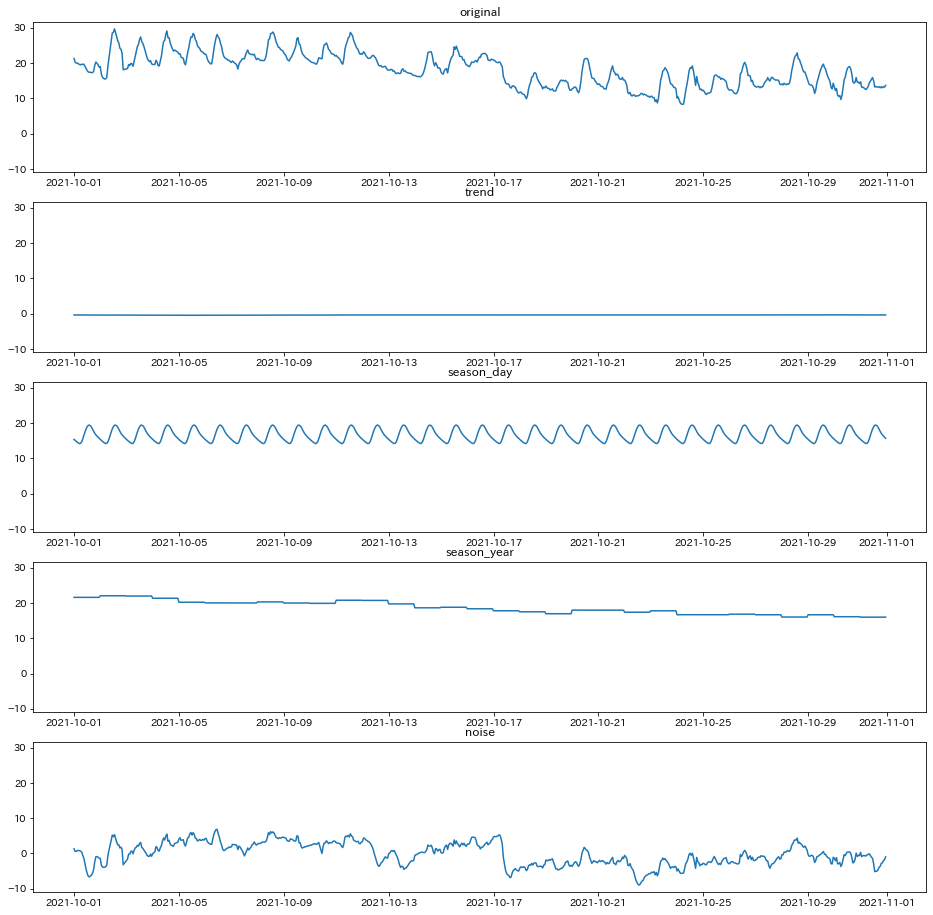

In [398]:
# 並べて表示(リアル表示、1カ月)
graph = {
    "original":df_weather[element],
    "trend":trend,
    "season_day":season_day,
    "season_year":season_year,
    "noise":noise
}

nrows = len(graph)
fig,axes = plt.subplots(nrows=nrows,ncols=1,sharey="all",figsize=(16,16))

for num,(key,value) in enumerate(graph.items()):
    axes[num].plot(value[start:end])
    axes[num].set_title(key)

plt.show()

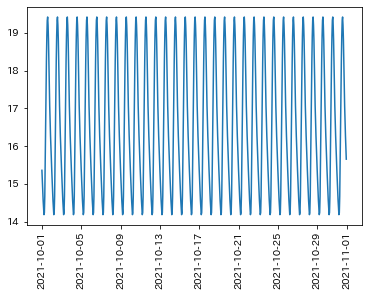

In [23]:
# 季節成分を取り出す
# 1日周期

start = "2021-10-01"
end = "2021-10-31"
days = int(df_weather.shape[0]/24)
years = int(df_weather.shape[0]/(24*365))

# 平均の計算
hour_mean = []
for hour in df_weather.index.hour.unique():
    condition = df_weather.index.hour == hour
    mean = df_weather.loc[condition,element].mean()
    hour_mean.append([hour,mean])
    
hour_mean = np.array(hour_mean)

# くり返して完成
season_day = pd.DataFrame(np.tile(hour_mean[:,1],days),index=df_weather.index)
plt.plot(season_day[start:end])
plt.xticks(rotation=90)
plt.show()

In [42]:
# 季節成分を取り出す
# 1年周期
# 結構時間かかるやで
rolling_mean_day = df_weather[element].rolling(24,min_periods=20,center=True).mean()

year_mean = []
for month in df_weather.index.month.unique():
    for day in df_weather.index.day.unique():
        for hour in df_weather.index.hour.unique():
            condition = (df_weather.index.month == month) & (df_weather.index.day == day) & (df_weather.index.hour == hour)
            mean = rolling_mean_day.loc[condition].mean()
            year_mean.append([month,day,hour,mean])
            print([month,day,hour])

[11, 29, 1]
[11, 29, 2]
[11, 29, 3]
[11, 29, 4]
[11, 29, 5]
[11, 29, 6]
[11, 29, 7]
[11, 29, 8]
[11, 29, 9]
[11, 29, 10]
[11, 29, 11]
[11, 29, 12]
[11, 29, 13]
[11, 29, 14]
[11, 29, 15]
[11, 29, 16]
[11, 29, 17]
[11, 29, 18]
[11, 29, 19]
[11, 29, 20]
[11, 29, 21]
[11, 29, 22]
[11, 29, 23]
[11, 29, 0]
[11, 30, 1]
[11, 30, 2]
[11, 30, 3]
[11, 30, 4]
[11, 30, 5]
[11, 30, 6]
[11, 30, 7]
[11, 30, 8]
[11, 30, 9]
[11, 30, 10]
[11, 30, 11]
[11, 30, 12]
[11, 30, 13]
[11, 30, 14]
[11, 30, 15]
[11, 30, 16]
[11, 30, 17]
[11, 30, 18]
[11, 30, 19]
[11, 30, 20]
[11, 30, 21]
[11, 30, 22]
[11, 30, 23]
[11, 30, 0]
[11, 1, 1]
[11, 1, 2]
[11, 1, 3]
[11, 1, 4]
[11, 1, 5]
[11, 1, 6]
[11, 1, 7]
[11, 1, 8]
[11, 1, 9]
[11, 1, 10]
[11, 1, 11]
[11, 1, 12]
[11, 1, 13]
[11, 1, 14]
[11, 1, 15]
[11, 1, 16]
[11, 1, 17]
[11, 1, 18]
[11, 1, 19]
[11, 1, 20]
[11, 1, 21]
[11, 1, 22]
[11, 1, 23]
[11, 1, 0]
[11, 2, 1]
[11, 2, 2]
[11, 2, 3]
[11, 2, 4]
[11, 2, 5]
[11, 2, 6]
[11, 2, 7]
[11, 2, 8]
[11, 2, 9]
[11, 2, 10]
[11, 2,

[11, 26, 0]
[11, 27, 1]
[11, 27, 2]
[11, 27, 3]
[11, 27, 4]
[11, 27, 5]
[11, 27, 6]
[11, 27, 7]
[11, 27, 8]
[11, 27, 9]
[11, 27, 10]
[11, 27, 11]
[11, 27, 12]
[11, 27, 13]
[11, 27, 14]
[11, 27, 15]
[11, 27, 16]
[11, 27, 17]
[11, 27, 18]
[11, 27, 19]
[11, 27, 20]
[11, 27, 21]
[11, 27, 22]
[11, 27, 23]
[11, 27, 0]
[11, 28, 1]
[11, 28, 2]
[11, 28, 3]
[11, 28, 4]
[11, 28, 5]
[11, 28, 6]
[11, 28, 7]
[11, 28, 8]
[11, 28, 9]
[11, 28, 10]
[11, 28, 11]
[11, 28, 12]
[11, 28, 13]
[11, 28, 14]
[11, 28, 15]
[11, 28, 16]
[11, 28, 17]
[11, 28, 18]
[11, 28, 19]
[11, 28, 20]
[11, 28, 21]
[11, 28, 22]
[11, 28, 23]
[11, 28, 0]
[11, 31, 1]
[11, 31, 2]
[11, 31, 3]
[11, 31, 4]
[11, 31, 5]
[11, 31, 6]
[11, 31, 7]
[11, 31, 8]
[11, 31, 9]
[11, 31, 10]
[11, 31, 11]
[11, 31, 12]
[11, 31, 13]
[11, 31, 14]
[11, 31, 15]
[11, 31, 16]
[11, 31, 17]
[11, 31, 18]
[11, 31, 19]
[11, 31, 20]
[11, 31, 21]
[11, 31, 22]
[11, 31, 23]
[11, 31, 0]
[12, 29, 1]
[12, 29, 2]
[12, 29, 3]
[12, 29, 4]
[12, 29, 5]
[12, 29, 6]
[12, 29, 7

[12, 23, 0]
[12, 24, 1]
[12, 24, 2]
[12, 24, 3]
[12, 24, 4]
[12, 24, 5]
[12, 24, 6]
[12, 24, 7]
[12, 24, 8]
[12, 24, 9]
[12, 24, 10]
[12, 24, 11]
[12, 24, 12]
[12, 24, 13]
[12, 24, 14]
[12, 24, 15]
[12, 24, 16]
[12, 24, 17]
[12, 24, 18]
[12, 24, 19]
[12, 24, 20]
[12, 24, 21]
[12, 24, 22]
[12, 24, 23]
[12, 24, 0]
[12, 25, 1]
[12, 25, 2]
[12, 25, 3]
[12, 25, 4]
[12, 25, 5]
[12, 25, 6]
[12, 25, 7]
[12, 25, 8]
[12, 25, 9]
[12, 25, 10]
[12, 25, 11]
[12, 25, 12]
[12, 25, 13]
[12, 25, 14]
[12, 25, 15]
[12, 25, 16]
[12, 25, 17]
[12, 25, 18]
[12, 25, 19]
[12, 25, 20]
[12, 25, 21]
[12, 25, 22]
[12, 25, 23]
[12, 25, 0]
[12, 26, 1]
[12, 26, 2]
[12, 26, 3]
[12, 26, 4]
[12, 26, 5]
[12, 26, 6]
[12, 26, 7]
[12, 26, 8]
[12, 26, 9]
[12, 26, 10]
[12, 26, 11]
[12, 26, 12]
[12, 26, 13]
[12, 26, 14]
[12, 26, 15]
[12, 26, 16]
[12, 26, 17]
[12, 26, 18]
[12, 26, 19]
[12, 26, 20]
[12, 26, 21]
[12, 26, 22]
[12, 26, 23]
[12, 26, 0]
[12, 27, 1]
[12, 27, 2]
[12, 27, 3]
[12, 27, 4]
[12, 27, 5]
[12, 27, 6]
[12, 27, 7

[1, 22, 21]
[1, 22, 22]
[1, 22, 23]
[1, 22, 0]
[1, 23, 1]
[1, 23, 2]
[1, 23, 3]
[1, 23, 4]
[1, 23, 5]
[1, 23, 6]
[1, 23, 7]
[1, 23, 8]
[1, 23, 9]
[1, 23, 10]
[1, 23, 11]
[1, 23, 12]
[1, 23, 13]
[1, 23, 14]
[1, 23, 15]
[1, 23, 16]
[1, 23, 17]
[1, 23, 18]
[1, 23, 19]
[1, 23, 20]
[1, 23, 21]
[1, 23, 22]
[1, 23, 23]
[1, 23, 0]
[1, 24, 1]
[1, 24, 2]
[1, 24, 3]
[1, 24, 4]
[1, 24, 5]
[1, 24, 6]
[1, 24, 7]
[1, 24, 8]
[1, 24, 9]
[1, 24, 10]
[1, 24, 11]
[1, 24, 12]
[1, 24, 13]
[1, 24, 14]
[1, 24, 15]
[1, 24, 16]
[1, 24, 17]
[1, 24, 18]
[1, 24, 19]
[1, 24, 20]
[1, 24, 21]
[1, 24, 22]
[1, 24, 23]
[1, 24, 0]
[1, 25, 1]
[1, 25, 2]
[1, 25, 3]
[1, 25, 4]
[1, 25, 5]
[1, 25, 6]
[1, 25, 7]
[1, 25, 8]
[1, 25, 9]
[1, 25, 10]
[1, 25, 11]
[1, 25, 12]
[1, 25, 13]
[1, 25, 14]
[1, 25, 15]
[1, 25, 16]
[1, 25, 17]
[1, 25, 18]
[1, 25, 19]
[1, 25, 20]
[1, 25, 21]
[1, 25, 22]
[1, 25, 23]
[1, 25, 0]
[1, 26, 1]
[1, 26, 2]
[1, 26, 3]
[1, 26, 4]
[1, 26, 5]
[1, 26, 6]
[1, 26, 7]
[1, 26, 8]
[1, 26, 9]
[1, 26, 10]
[1, 26, 

[2, 22, 6]
[2, 22, 7]
[2, 22, 8]
[2, 22, 9]
[2, 22, 10]
[2, 22, 11]
[2, 22, 12]
[2, 22, 13]
[2, 22, 14]
[2, 22, 15]
[2, 22, 16]
[2, 22, 17]
[2, 22, 18]
[2, 22, 19]
[2, 22, 20]
[2, 22, 21]
[2, 22, 22]
[2, 22, 23]
[2, 22, 0]
[2, 23, 1]
[2, 23, 2]
[2, 23, 3]
[2, 23, 4]
[2, 23, 5]
[2, 23, 6]
[2, 23, 7]
[2, 23, 8]
[2, 23, 9]
[2, 23, 10]
[2, 23, 11]
[2, 23, 12]
[2, 23, 13]
[2, 23, 14]
[2, 23, 15]
[2, 23, 16]
[2, 23, 17]
[2, 23, 18]
[2, 23, 19]
[2, 23, 20]
[2, 23, 21]
[2, 23, 22]
[2, 23, 23]
[2, 23, 0]
[2, 24, 1]
[2, 24, 2]
[2, 24, 3]
[2, 24, 4]
[2, 24, 5]
[2, 24, 6]
[2, 24, 7]
[2, 24, 8]
[2, 24, 9]
[2, 24, 10]
[2, 24, 11]
[2, 24, 12]
[2, 24, 13]
[2, 24, 14]
[2, 24, 15]
[2, 24, 16]
[2, 24, 17]
[2, 24, 18]
[2, 24, 19]
[2, 24, 20]
[2, 24, 21]
[2, 24, 22]
[2, 24, 23]
[2, 24, 0]
[2, 25, 1]
[2, 25, 2]
[2, 25, 3]
[2, 25, 4]
[2, 25, 5]
[2, 25, 6]
[2, 25, 7]
[2, 25, 8]
[2, 25, 9]
[2, 25, 10]
[2, 25, 11]
[2, 25, 12]
[2, 25, 13]
[2, 25, 14]
[2, 25, 15]
[2, 25, 16]
[2, 25, 17]
[2, 25, 18]
[2, 25, 19]
[2

[3, 21, 17]
[3, 21, 18]
[3, 21, 19]
[3, 21, 20]
[3, 21, 21]
[3, 21, 22]
[3, 21, 23]
[3, 21, 0]
[3, 22, 1]
[3, 22, 2]
[3, 22, 3]
[3, 22, 4]
[3, 22, 5]
[3, 22, 6]
[3, 22, 7]
[3, 22, 8]
[3, 22, 9]
[3, 22, 10]
[3, 22, 11]
[3, 22, 12]
[3, 22, 13]
[3, 22, 14]
[3, 22, 15]
[3, 22, 16]
[3, 22, 17]
[3, 22, 18]
[3, 22, 19]
[3, 22, 20]
[3, 22, 21]
[3, 22, 22]
[3, 22, 23]
[3, 22, 0]
[3, 23, 1]
[3, 23, 2]
[3, 23, 3]
[3, 23, 4]
[3, 23, 5]
[3, 23, 6]
[3, 23, 7]
[3, 23, 8]
[3, 23, 9]
[3, 23, 10]
[3, 23, 11]
[3, 23, 12]
[3, 23, 13]
[3, 23, 14]
[3, 23, 15]
[3, 23, 16]
[3, 23, 17]
[3, 23, 18]
[3, 23, 19]
[3, 23, 20]
[3, 23, 21]
[3, 23, 22]
[3, 23, 23]
[3, 23, 0]
[3, 24, 1]
[3, 24, 2]
[3, 24, 3]
[3, 24, 4]
[3, 24, 5]
[3, 24, 6]
[3, 24, 7]
[3, 24, 8]
[3, 24, 9]
[3, 24, 10]
[3, 24, 11]
[3, 24, 12]
[3, 24, 13]
[3, 24, 14]
[3, 24, 15]
[3, 24, 16]
[3, 24, 17]
[3, 24, 18]
[3, 24, 19]
[3, 24, 20]
[3, 24, 21]
[3, 24, 22]
[3, 24, 23]
[3, 24, 0]
[3, 25, 1]
[3, 25, 2]
[3, 25, 3]
[3, 25, 4]
[3, 25, 5]
[3, 25, 6]
[3, 2

[4, 21, 1]
[4, 21, 2]
[4, 21, 3]
[4, 21, 4]
[4, 21, 5]
[4, 21, 6]
[4, 21, 7]
[4, 21, 8]
[4, 21, 9]
[4, 21, 10]
[4, 21, 11]
[4, 21, 12]
[4, 21, 13]
[4, 21, 14]
[4, 21, 15]
[4, 21, 16]
[4, 21, 17]
[4, 21, 18]
[4, 21, 19]
[4, 21, 20]
[4, 21, 21]
[4, 21, 22]
[4, 21, 23]
[4, 21, 0]
[4, 22, 1]
[4, 22, 2]
[4, 22, 3]
[4, 22, 4]
[4, 22, 5]
[4, 22, 6]
[4, 22, 7]
[4, 22, 8]
[4, 22, 9]
[4, 22, 10]
[4, 22, 11]
[4, 22, 12]
[4, 22, 13]
[4, 22, 14]
[4, 22, 15]
[4, 22, 16]
[4, 22, 17]
[4, 22, 18]
[4, 22, 19]
[4, 22, 20]
[4, 22, 21]
[4, 22, 22]
[4, 22, 23]
[4, 22, 0]
[4, 23, 1]
[4, 23, 2]
[4, 23, 3]
[4, 23, 4]
[4, 23, 5]
[4, 23, 6]
[4, 23, 7]
[4, 23, 8]
[4, 23, 9]
[4, 23, 10]
[4, 23, 11]
[4, 23, 12]
[4, 23, 13]
[4, 23, 14]
[4, 23, 15]
[4, 23, 16]
[4, 23, 17]
[4, 23, 18]
[4, 23, 19]
[4, 23, 20]
[4, 23, 21]
[4, 23, 22]
[4, 23, 23]
[4, 23, 0]
[4, 24, 1]
[4, 24, 2]
[4, 24, 3]
[4, 24, 4]
[4, 24, 5]
[4, 24, 6]
[4, 24, 7]
[4, 24, 8]
[4, 24, 9]
[4, 24, 10]
[4, 24, 11]
[4, 24, 12]
[4, 24, 13]
[4, 24, 14]
[4, 24,

[5, 20, 11]
[5, 20, 12]
[5, 20, 13]
[5, 20, 14]
[5, 20, 15]
[5, 20, 16]
[5, 20, 17]
[5, 20, 18]
[5, 20, 19]
[5, 20, 20]
[5, 20, 21]
[5, 20, 22]
[5, 20, 23]
[5, 20, 0]
[5, 21, 1]
[5, 21, 2]
[5, 21, 3]
[5, 21, 4]
[5, 21, 5]
[5, 21, 6]
[5, 21, 7]
[5, 21, 8]
[5, 21, 9]
[5, 21, 10]
[5, 21, 11]
[5, 21, 12]
[5, 21, 13]
[5, 21, 14]
[5, 21, 15]
[5, 21, 16]
[5, 21, 17]
[5, 21, 18]
[5, 21, 19]
[5, 21, 20]
[5, 21, 21]
[5, 21, 22]
[5, 21, 23]
[5, 21, 0]
[5, 22, 1]
[5, 22, 2]
[5, 22, 3]
[5, 22, 4]
[5, 22, 5]
[5, 22, 6]
[5, 22, 7]
[5, 22, 8]
[5, 22, 9]
[5, 22, 10]
[5, 22, 11]
[5, 22, 12]
[5, 22, 13]
[5, 22, 14]
[5, 22, 15]
[5, 22, 16]
[5, 22, 17]
[5, 22, 18]
[5, 22, 19]
[5, 22, 20]
[5, 22, 21]
[5, 22, 22]
[5, 22, 23]
[5, 22, 0]
[5, 23, 1]
[5, 23, 2]
[5, 23, 3]
[5, 23, 4]
[5, 23, 5]
[5, 23, 6]
[5, 23, 7]
[5, 23, 8]
[5, 23, 9]
[5, 23, 10]
[5, 23, 11]
[5, 23, 12]
[5, 23, 13]
[5, 23, 14]
[5, 23, 15]
[5, 23, 16]
[5, 23, 17]
[5, 23, 18]
[5, 23, 19]
[5, 23, 20]
[5, 23, 21]
[5, 23, 22]
[5, 23, 23]
[5, 23, 0]

[6, 19, 17]
[6, 19, 18]
[6, 19, 19]
[6, 19, 20]
[6, 19, 21]
[6, 19, 22]
[6, 19, 23]
[6, 19, 0]
[6, 20, 1]
[6, 20, 2]
[6, 20, 3]
[6, 20, 4]
[6, 20, 5]
[6, 20, 6]
[6, 20, 7]
[6, 20, 8]
[6, 20, 9]
[6, 20, 10]
[6, 20, 11]
[6, 20, 12]
[6, 20, 13]
[6, 20, 14]
[6, 20, 15]
[6, 20, 16]
[6, 20, 17]
[6, 20, 18]
[6, 20, 19]
[6, 20, 20]
[6, 20, 21]
[6, 20, 22]
[6, 20, 23]
[6, 20, 0]
[6, 21, 1]
[6, 21, 2]
[6, 21, 3]
[6, 21, 4]
[6, 21, 5]
[6, 21, 6]
[6, 21, 7]
[6, 21, 8]
[6, 21, 9]
[6, 21, 10]
[6, 21, 11]
[6, 21, 12]
[6, 21, 13]
[6, 21, 14]
[6, 21, 15]
[6, 21, 16]
[6, 21, 17]
[6, 21, 18]
[6, 21, 19]
[6, 21, 20]
[6, 21, 21]
[6, 21, 22]
[6, 21, 23]
[6, 21, 0]
[6, 22, 1]
[6, 22, 2]
[6, 22, 3]
[6, 22, 4]
[6, 22, 5]
[6, 22, 6]
[6, 22, 7]
[6, 22, 8]
[6, 22, 9]
[6, 22, 10]
[6, 22, 11]
[6, 22, 12]
[6, 22, 13]
[6, 22, 14]
[6, 22, 15]
[6, 22, 16]
[6, 22, 17]
[6, 22, 18]
[6, 22, 19]
[6, 22, 20]
[6, 22, 21]
[6, 22, 22]
[6, 22, 23]
[6, 22, 0]
[6, 23, 1]
[6, 23, 2]
[6, 23, 3]
[6, 23, 4]
[6, 23, 5]
[6, 23, 6]
[6, 2

[7, 19, 1]
[7, 19, 2]
[7, 19, 3]
[7, 19, 4]
[7, 19, 5]
[7, 19, 6]
[7, 19, 7]
[7, 19, 8]
[7, 19, 9]
[7, 19, 10]
[7, 19, 11]
[7, 19, 12]
[7, 19, 13]
[7, 19, 14]
[7, 19, 15]
[7, 19, 16]
[7, 19, 17]
[7, 19, 18]
[7, 19, 19]
[7, 19, 20]
[7, 19, 21]
[7, 19, 22]
[7, 19, 23]
[7, 19, 0]
[7, 20, 1]
[7, 20, 2]
[7, 20, 3]
[7, 20, 4]
[7, 20, 5]
[7, 20, 6]
[7, 20, 7]
[7, 20, 8]
[7, 20, 9]
[7, 20, 10]
[7, 20, 11]
[7, 20, 12]
[7, 20, 13]
[7, 20, 14]
[7, 20, 15]
[7, 20, 16]
[7, 20, 17]
[7, 20, 18]
[7, 20, 19]
[7, 20, 20]
[7, 20, 21]
[7, 20, 22]
[7, 20, 23]
[7, 20, 0]
[7, 21, 1]
[7, 21, 2]
[7, 21, 3]
[7, 21, 4]
[7, 21, 5]
[7, 21, 6]
[7, 21, 7]
[7, 21, 8]
[7, 21, 9]
[7, 21, 10]
[7, 21, 11]
[7, 21, 12]
[7, 21, 13]
[7, 21, 14]
[7, 21, 15]
[7, 21, 16]
[7, 21, 17]
[7, 21, 18]
[7, 21, 19]
[7, 21, 20]
[7, 21, 21]
[7, 21, 22]
[7, 21, 23]
[7, 21, 0]
[7, 22, 1]
[7, 22, 2]
[7, 22, 3]
[7, 22, 4]
[7, 22, 5]
[7, 22, 6]
[7, 22, 7]
[7, 22, 8]
[7, 22, 9]
[7, 22, 10]
[7, 22, 11]
[7, 22, 12]
[7, 22, 13]
[7, 22, 14]
[7, 22,

[8, 18, 12]
[8, 18, 13]
[8, 18, 14]
[8, 18, 15]
[8, 18, 16]
[8, 18, 17]
[8, 18, 18]
[8, 18, 19]
[8, 18, 20]
[8, 18, 21]
[8, 18, 22]
[8, 18, 23]
[8, 18, 0]
[8, 19, 1]
[8, 19, 2]
[8, 19, 3]
[8, 19, 4]
[8, 19, 5]
[8, 19, 6]
[8, 19, 7]
[8, 19, 8]
[8, 19, 9]
[8, 19, 10]
[8, 19, 11]
[8, 19, 12]
[8, 19, 13]
[8, 19, 14]
[8, 19, 15]
[8, 19, 16]
[8, 19, 17]
[8, 19, 18]
[8, 19, 19]
[8, 19, 20]
[8, 19, 21]
[8, 19, 22]
[8, 19, 23]
[8, 19, 0]
[8, 20, 1]
[8, 20, 2]
[8, 20, 3]
[8, 20, 4]
[8, 20, 5]
[8, 20, 6]
[8, 20, 7]
[8, 20, 8]
[8, 20, 9]
[8, 20, 10]
[8, 20, 11]
[8, 20, 12]
[8, 20, 13]
[8, 20, 14]
[8, 20, 15]
[8, 20, 16]
[8, 20, 17]
[8, 20, 18]
[8, 20, 19]
[8, 20, 20]
[8, 20, 21]
[8, 20, 22]
[8, 20, 23]
[8, 20, 0]
[8, 21, 1]
[8, 21, 2]
[8, 21, 3]
[8, 21, 4]
[8, 21, 5]
[8, 21, 6]
[8, 21, 7]
[8, 21, 8]
[8, 21, 9]
[8, 21, 10]
[8, 21, 11]
[8, 21, 12]
[8, 21, 13]
[8, 21, 14]
[8, 21, 15]
[8, 21, 16]
[8, 21, 17]
[8, 21, 18]
[8, 21, 19]
[8, 21, 20]
[8, 21, 21]
[8, 21, 22]
[8, 21, 23]
[8, 21, 0]
[8, 22, 1]


[9, 17, 19]
[9, 17, 20]
[9, 17, 21]
[9, 17, 22]
[9, 17, 23]
[9, 17, 0]
[9, 18, 1]
[9, 18, 2]
[9, 18, 3]
[9, 18, 4]
[9, 18, 5]
[9, 18, 6]
[9, 18, 7]
[9, 18, 8]
[9, 18, 9]
[9, 18, 10]
[9, 18, 11]
[9, 18, 12]
[9, 18, 13]
[9, 18, 14]
[9, 18, 15]
[9, 18, 16]
[9, 18, 17]
[9, 18, 18]
[9, 18, 19]
[9, 18, 20]
[9, 18, 21]
[9, 18, 22]
[9, 18, 23]
[9, 18, 0]
[9, 19, 1]
[9, 19, 2]
[9, 19, 3]
[9, 19, 4]
[9, 19, 5]
[9, 19, 6]
[9, 19, 7]
[9, 19, 8]
[9, 19, 9]
[9, 19, 10]
[9, 19, 11]
[9, 19, 12]
[9, 19, 13]
[9, 19, 14]
[9, 19, 15]
[9, 19, 16]
[9, 19, 17]
[9, 19, 18]
[9, 19, 19]
[9, 19, 20]
[9, 19, 21]
[9, 19, 22]
[9, 19, 23]
[9, 19, 0]
[9, 20, 1]
[9, 20, 2]
[9, 20, 3]
[9, 20, 4]
[9, 20, 5]
[9, 20, 6]
[9, 20, 7]
[9, 20, 8]
[9, 20, 9]
[9, 20, 10]
[9, 20, 11]
[9, 20, 12]
[9, 20, 13]
[9, 20, 14]
[9, 20, 15]
[9, 20, 16]
[9, 20, 17]
[9, 20, 18]
[9, 20, 19]
[9, 20, 20]
[9, 20, 21]
[9, 20, 22]
[9, 20, 23]
[9, 20, 0]
[9, 21, 1]
[9, 21, 2]
[9, 21, 3]
[9, 21, 4]
[9, 21, 5]
[9, 21, 6]
[9, 21, 7]
[9, 21, 8]
[9, 21,

[10, 15, 19]
[10, 15, 20]
[10, 15, 21]
[10, 15, 22]
[10, 15, 23]
[10, 15, 0]
[10, 16, 1]
[10, 16, 2]
[10, 16, 3]
[10, 16, 4]
[10, 16, 5]
[10, 16, 6]
[10, 16, 7]
[10, 16, 8]
[10, 16, 9]
[10, 16, 10]
[10, 16, 11]
[10, 16, 12]
[10, 16, 13]
[10, 16, 14]
[10, 16, 15]
[10, 16, 16]
[10, 16, 17]
[10, 16, 18]
[10, 16, 19]
[10, 16, 20]
[10, 16, 21]
[10, 16, 22]
[10, 16, 23]
[10, 16, 0]
[10, 17, 1]
[10, 17, 2]
[10, 17, 3]
[10, 17, 4]
[10, 17, 5]
[10, 17, 6]
[10, 17, 7]
[10, 17, 8]
[10, 17, 9]
[10, 17, 10]
[10, 17, 11]
[10, 17, 12]
[10, 17, 13]
[10, 17, 14]
[10, 17, 15]
[10, 17, 16]
[10, 17, 17]
[10, 17, 18]
[10, 17, 19]
[10, 17, 20]
[10, 17, 21]
[10, 17, 22]
[10, 17, 23]
[10, 17, 0]
[10, 18, 1]
[10, 18, 2]
[10, 18, 3]
[10, 18, 4]
[10, 18, 5]
[10, 18, 6]
[10, 18, 7]
[10, 18, 8]
[10, 18, 9]
[10, 18, 10]
[10, 18, 11]
[10, 18, 12]
[10, 18, 13]
[10, 18, 14]
[10, 18, 15]
[10, 18, 16]
[10, 18, 17]
[10, 18, 18]
[10, 18, 19]
[10, 18, 20]
[10, 18, 21]
[10, 18, 22]
[10, 18, 23]
[10, 18, 0]
[10, 19, 1]
[10, 

In [43]:
year_mean = np.array(year_mean)
year_mean = pd.DataFrame(year_mean,columns=["month","day","hour","mean"]).dropna().sort_values(["month","day","hour"]).reset_index(drop=True)

In [44]:
# くり返して完成
df_weather_copy = copy(df_weather)
df_weather_copy["month"] = df_weather_copy.index.month
df_weather_copy["day"] = df_weather_copy.index.day
df_weather_copy["hour"] = df_weather_copy.index.hour
df_weather_copy["datetime"] = df_weather_copy.index
df_weather_copy2 = pd.merge(df_weather_copy,year_mean,on=["month","day","hour"],how="left")
season_year = df_weather_copy2.set_index("datetime").drop(df_weather_copy2.columns[:12],axis=1)

C:\Users\doubl\AppData\Local\Temp\ipykernel_35188\3101899407.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(season_year["2022-10-02"])


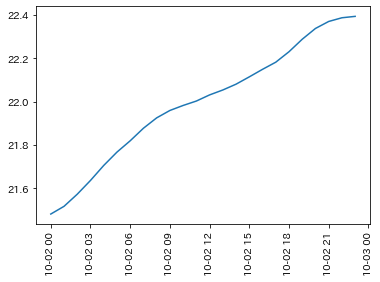

In [45]:
plt.plot(season_year["2022-10-02"])
plt.xticks(rotation=90)
plt.show()

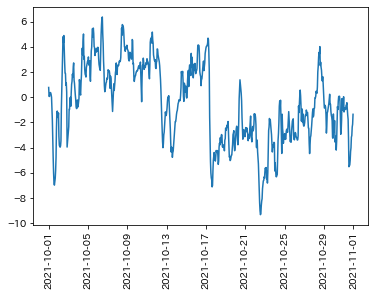

In [46]:
# トレンド＋ノイズ = 元データ - 季節成分

trend_noise =  df_weather[element] - season_day.values.reshape(-1) - season_year.values.reshape(-1) + df_weather[element].mean()
plt.plot(trend_noise[start:end])
plt.xticks(rotation=90)
plt.show()

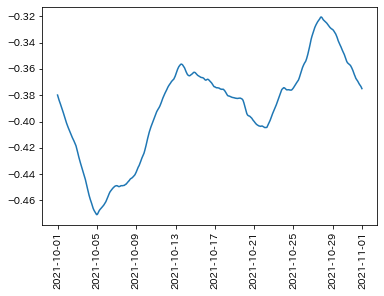

In [47]:
# トレンド
span = 24*365

trend = trend_noise.rolling(span,min_periods=24*364,center=True).mean()
plt.plot(trend[start:end])
plt.xticks(rotation=90)
plt.show()

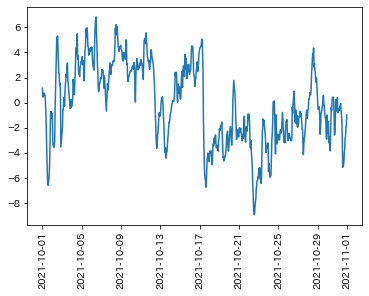

In [48]:
# ノイズ
noise = trend_noise - trend
plt.plot(noise[start:end])
plt.xticks(rotation=90)
plt.show()

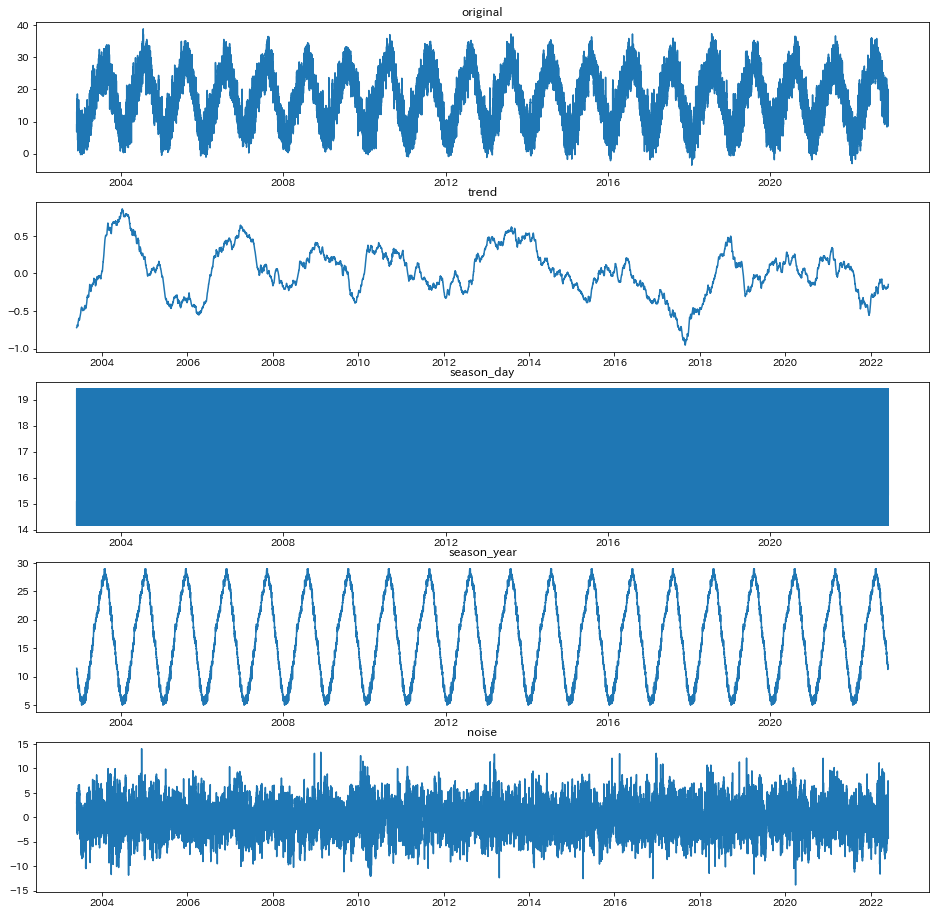

In [49]:
# 並べて表示(軸調整なし)
graph = {
    "original":df_weather[element],
    "trend":trend,
    "season_day":season_day,
    "season_year":season_year,
    "noise":noise
}

nrows = len(graph)
fig,axes = plt.subplots(nrows=nrows,ncols=1,figsize=(16,16))

for num,(key,value) in enumerate(graph.items()):
    axes[num].plot(value)
    axes[num].set_title(key)

plt.show()

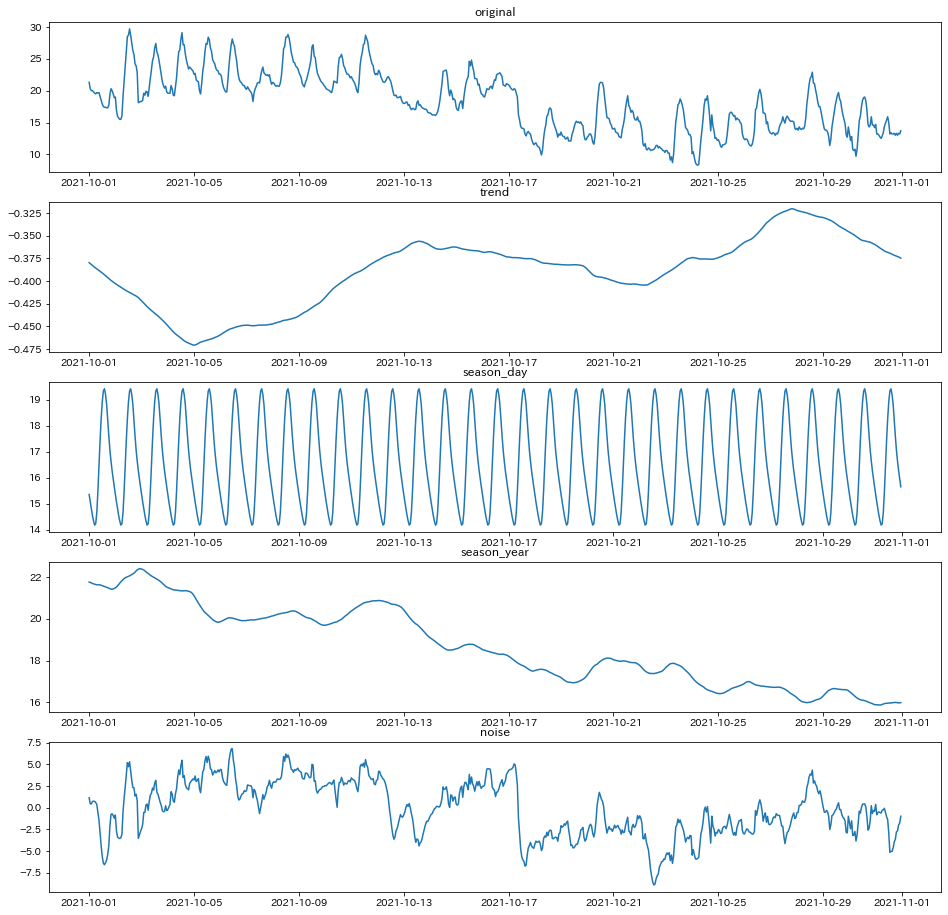

In [50]:
# 並べて表示(軸調整なし、1カ月)
graph = {
    "original":df_weather[element],
    "trend":trend,
    "season_day":season_day,
    "season_year":season_year,
    "noise":noise
}

nrows = len(graph)
fig,axes = plt.subplots(nrows=nrows,ncols=1,figsize=(16,16))

for num,(key,value) in enumerate(graph.items()):
    axes[num].plot(value[start:end])
    axes[num].set_title(key)

plt.show()

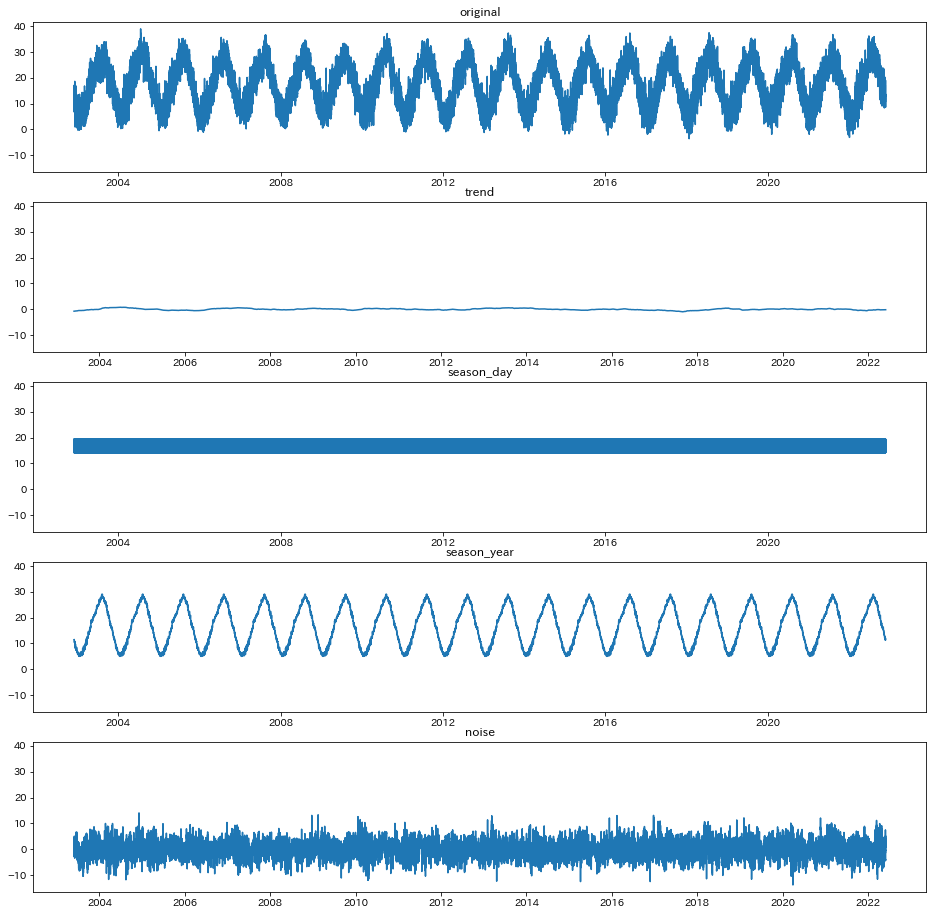

In [51]:
# 並べて表示(リアル表示)
graph = {
    "original":df_weather[element],
    "trend":trend,
    "season_day":season_day,
    "season_year":season_year,
    "noise":noise
}

nrows = len(graph)
fig,axes = plt.subplots(nrows=nrows,ncols=1,sharey="all",figsize=(16,16))

for num,(key,value) in enumerate(graph.items()):
    axes[num].plot(value)
    axes[num].set_title(key)

plt.show()

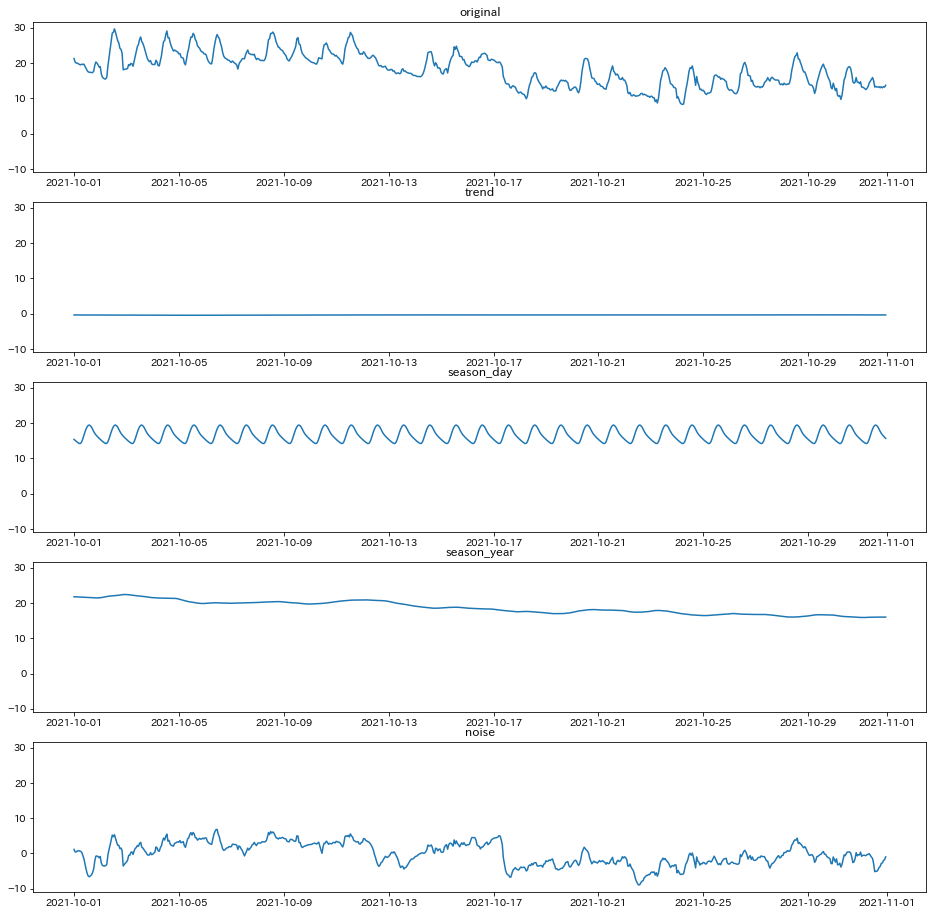

In [52]:
# 並べて表示(リアル表示、1カ月)
graph = {
    "original":df_weather[element],
    "trend":trend,
    "season_day":season_day,
    "season_year":season_year,
    "noise":noise
}

nrows = len(graph)
fig,axes = plt.subplots(nrows=nrows,ncols=1,sharey="all",figsize=(16,16))

for num,(key,value) in enumerate(graph.items()):
    axes[num].plot(value[start:end])
    axes[num].set_title(key)

plt.show()

In [238]:
# 先に年周期をとりのぞいたらいかがでしょうか？

# 季節成分を取り出す
# 1年周期
# 結構時間かかるやで

start = "2021-10-01"
end = "2021-10-31"
days = int(df_weather.shape[0]/24)
years = int(df_weather.shape[0]/(24*365))

year_mean = []
for month in df_weather.index.month.unique():
    for day in df_weather.index.day.unique():
        for hour in df_weather.index.hour.unique():
            condition = (df_weather.index.month == month) & (df_weather.index.day == day) & (df_weather.index.hour == hour)
            mean = df_weather.loc[condition,element].mean()
            year_mean.append([month,day,hour,mean])
            print([month,day,hour])

[11, 29, 1]
[11, 29, 2]
[11, 29, 3]
[11, 29, 4]
[11, 29, 5]
[11, 29, 6]
[11, 29, 7]
[11, 29, 8]
[11, 29, 9]
[11, 29, 10]
[11, 29, 11]
[11, 29, 12]
[11, 29, 13]
[11, 29, 14]
[11, 29, 15]
[11, 29, 16]
[11, 29, 17]
[11, 29, 18]
[11, 29, 19]
[11, 29, 20]
[11, 29, 21]
[11, 29, 22]
[11, 29, 23]
[11, 29, 0]
[11, 30, 1]
[11, 30, 2]
[11, 30, 3]
[11, 30, 4]
[11, 30, 5]
[11, 30, 6]
[11, 30, 7]
[11, 30, 8]
[11, 30, 9]
[11, 30, 10]
[11, 30, 11]
[11, 30, 12]
[11, 30, 13]
[11, 30, 14]
[11, 30, 15]
[11, 30, 16]
[11, 30, 17]
[11, 30, 18]
[11, 30, 19]
[11, 30, 20]
[11, 30, 21]
[11, 30, 22]
[11, 30, 23]
[11, 30, 0]
[11, 1, 1]
[11, 1, 2]
[11, 1, 3]
[11, 1, 4]
[11, 1, 5]
[11, 1, 6]
[11, 1, 7]
[11, 1, 8]
[11, 1, 9]
[11, 1, 10]
[11, 1, 11]
[11, 1, 12]
[11, 1, 13]
[11, 1, 14]
[11, 1, 15]
[11, 1, 16]
[11, 1, 17]
[11, 1, 18]
[11, 1, 19]
[11, 1, 20]
[11, 1, 21]
[11, 1, 22]
[11, 1, 23]
[11, 1, 0]
[11, 2, 1]
[11, 2, 2]
[11, 2, 3]
[11, 2, 4]
[11, 2, 5]
[11, 2, 6]
[11, 2, 7]
[11, 2, 8]
[11, 2, 9]
[11, 2, 10]
[11, 2,

[11, 26, 23]
[11, 26, 0]
[11, 27, 1]
[11, 27, 2]
[11, 27, 3]
[11, 27, 4]
[11, 27, 5]
[11, 27, 6]
[11, 27, 7]
[11, 27, 8]
[11, 27, 9]
[11, 27, 10]
[11, 27, 11]
[11, 27, 12]
[11, 27, 13]
[11, 27, 14]
[11, 27, 15]
[11, 27, 16]
[11, 27, 17]
[11, 27, 18]
[11, 27, 19]
[11, 27, 20]
[11, 27, 21]
[11, 27, 22]
[11, 27, 23]
[11, 27, 0]
[11, 28, 1]
[11, 28, 2]
[11, 28, 3]
[11, 28, 4]
[11, 28, 5]
[11, 28, 6]
[11, 28, 7]
[11, 28, 8]
[11, 28, 9]
[11, 28, 10]
[11, 28, 11]
[11, 28, 12]
[11, 28, 13]
[11, 28, 14]
[11, 28, 15]
[11, 28, 16]
[11, 28, 17]
[11, 28, 18]
[11, 28, 19]
[11, 28, 20]
[11, 28, 21]
[11, 28, 22]
[11, 28, 23]
[11, 28, 0]
[11, 31, 1]
[11, 31, 2]
[11, 31, 3]
[11, 31, 4]
[11, 31, 5]
[11, 31, 6]
[11, 31, 7]
[11, 31, 8]
[11, 31, 9]
[11, 31, 10]
[11, 31, 11]
[11, 31, 12]
[11, 31, 13]
[11, 31, 14]
[11, 31, 15]
[11, 31, 16]
[11, 31, 17]
[11, 31, 18]
[11, 31, 19]
[11, 31, 20]
[11, 31, 21]
[11, 31, 22]
[11, 31, 23]
[11, 31, 0]
[12, 29, 1]
[12, 29, 2]
[12, 29, 3]
[12, 29, 4]
[12, 29, 5]
[12, 29, 

[12, 23, 22]
[12, 23, 23]
[12, 23, 0]
[12, 24, 1]
[12, 24, 2]
[12, 24, 3]
[12, 24, 4]
[12, 24, 5]
[12, 24, 6]
[12, 24, 7]
[12, 24, 8]
[12, 24, 9]
[12, 24, 10]
[12, 24, 11]
[12, 24, 12]
[12, 24, 13]
[12, 24, 14]
[12, 24, 15]
[12, 24, 16]
[12, 24, 17]
[12, 24, 18]
[12, 24, 19]
[12, 24, 20]
[12, 24, 21]
[12, 24, 22]
[12, 24, 23]
[12, 24, 0]
[12, 25, 1]
[12, 25, 2]
[12, 25, 3]
[12, 25, 4]
[12, 25, 5]
[12, 25, 6]
[12, 25, 7]
[12, 25, 8]
[12, 25, 9]
[12, 25, 10]
[12, 25, 11]
[12, 25, 12]
[12, 25, 13]
[12, 25, 14]
[12, 25, 15]
[12, 25, 16]
[12, 25, 17]
[12, 25, 18]
[12, 25, 19]
[12, 25, 20]
[12, 25, 21]
[12, 25, 22]
[12, 25, 23]
[12, 25, 0]
[12, 26, 1]
[12, 26, 2]
[12, 26, 3]
[12, 26, 4]
[12, 26, 5]
[12, 26, 6]
[12, 26, 7]
[12, 26, 8]
[12, 26, 9]
[12, 26, 10]
[12, 26, 11]
[12, 26, 12]
[12, 26, 13]
[12, 26, 14]
[12, 26, 15]
[12, 26, 16]
[12, 26, 17]
[12, 26, 18]
[12, 26, 19]
[12, 26, 20]
[12, 26, 21]
[12, 26, 22]
[12, 26, 23]
[12, 26, 0]
[12, 27, 1]
[12, 27, 2]
[12, 27, 3]
[12, 27, 4]
[12, 27,

[1, 22, 17]
[1, 22, 18]
[1, 22, 19]
[1, 22, 20]
[1, 22, 21]
[1, 22, 22]
[1, 22, 23]
[1, 22, 0]
[1, 23, 1]
[1, 23, 2]
[1, 23, 3]
[1, 23, 4]
[1, 23, 5]
[1, 23, 6]
[1, 23, 7]
[1, 23, 8]
[1, 23, 9]
[1, 23, 10]
[1, 23, 11]
[1, 23, 12]
[1, 23, 13]
[1, 23, 14]
[1, 23, 15]
[1, 23, 16]
[1, 23, 17]
[1, 23, 18]
[1, 23, 19]
[1, 23, 20]
[1, 23, 21]
[1, 23, 22]
[1, 23, 23]
[1, 23, 0]
[1, 24, 1]
[1, 24, 2]
[1, 24, 3]
[1, 24, 4]
[1, 24, 5]
[1, 24, 6]
[1, 24, 7]
[1, 24, 8]
[1, 24, 9]
[1, 24, 10]
[1, 24, 11]
[1, 24, 12]
[1, 24, 13]
[1, 24, 14]
[1, 24, 15]
[1, 24, 16]
[1, 24, 17]
[1, 24, 18]
[1, 24, 19]
[1, 24, 20]
[1, 24, 21]
[1, 24, 22]
[1, 24, 23]
[1, 24, 0]
[1, 25, 1]
[1, 25, 2]
[1, 25, 3]
[1, 25, 4]
[1, 25, 5]
[1, 25, 6]
[1, 25, 7]
[1, 25, 8]
[1, 25, 9]
[1, 25, 10]
[1, 25, 11]
[1, 25, 12]
[1, 25, 13]
[1, 25, 14]
[1, 25, 15]
[1, 25, 16]
[1, 25, 17]
[1, 25, 18]
[1, 25, 19]
[1, 25, 20]
[1, 25, 21]
[1, 25, 22]
[1, 25, 23]
[1, 25, 0]
[1, 26, 1]
[1, 26, 2]
[1, 26, 3]
[1, 26, 4]
[1, 26, 5]
[1, 26, 6]
[1, 2

[2, 21, 23]
[2, 21, 0]
[2, 22, 1]
[2, 22, 2]
[2, 22, 3]
[2, 22, 4]
[2, 22, 5]
[2, 22, 6]
[2, 22, 7]
[2, 22, 8]
[2, 22, 9]
[2, 22, 10]
[2, 22, 11]
[2, 22, 12]
[2, 22, 13]
[2, 22, 14]
[2, 22, 15]
[2, 22, 16]
[2, 22, 17]
[2, 22, 18]
[2, 22, 19]
[2, 22, 20]
[2, 22, 21]
[2, 22, 22]
[2, 22, 23]
[2, 22, 0]
[2, 23, 1]
[2, 23, 2]
[2, 23, 3]
[2, 23, 4]
[2, 23, 5]
[2, 23, 6]
[2, 23, 7]
[2, 23, 8]
[2, 23, 9]
[2, 23, 10]
[2, 23, 11]
[2, 23, 12]
[2, 23, 13]
[2, 23, 14]
[2, 23, 15]
[2, 23, 16]
[2, 23, 17]
[2, 23, 18]
[2, 23, 19]
[2, 23, 20]
[2, 23, 21]
[2, 23, 22]
[2, 23, 23]
[2, 23, 0]
[2, 24, 1]
[2, 24, 2]
[2, 24, 3]
[2, 24, 4]
[2, 24, 5]
[2, 24, 6]
[2, 24, 7]
[2, 24, 8]
[2, 24, 9]
[2, 24, 10]
[2, 24, 11]
[2, 24, 12]
[2, 24, 13]
[2, 24, 14]
[2, 24, 15]
[2, 24, 16]
[2, 24, 17]
[2, 24, 18]
[2, 24, 19]
[2, 24, 20]
[2, 24, 21]
[2, 24, 22]
[2, 24, 23]
[2, 24, 0]
[2, 25, 1]
[2, 25, 2]
[2, 25, 3]
[2, 25, 4]
[2, 25, 5]
[2, 25, 6]
[2, 25, 7]
[2, 25, 8]
[2, 25, 9]
[2, 25, 10]
[2, 25, 11]
[2, 25, 12]
[2, 25, 

[3, 21, 9]
[3, 21, 10]
[3, 21, 11]
[3, 21, 12]
[3, 21, 13]
[3, 21, 14]
[3, 21, 15]
[3, 21, 16]
[3, 21, 17]
[3, 21, 18]
[3, 21, 19]
[3, 21, 20]
[3, 21, 21]
[3, 21, 22]
[3, 21, 23]
[3, 21, 0]
[3, 22, 1]
[3, 22, 2]
[3, 22, 3]
[3, 22, 4]
[3, 22, 5]
[3, 22, 6]
[3, 22, 7]
[3, 22, 8]
[3, 22, 9]
[3, 22, 10]
[3, 22, 11]
[3, 22, 12]
[3, 22, 13]
[3, 22, 14]
[3, 22, 15]
[3, 22, 16]
[3, 22, 17]
[3, 22, 18]
[3, 22, 19]
[3, 22, 20]
[3, 22, 21]
[3, 22, 22]
[3, 22, 23]
[3, 22, 0]
[3, 23, 1]
[3, 23, 2]
[3, 23, 3]
[3, 23, 4]
[3, 23, 5]
[3, 23, 6]
[3, 23, 7]
[3, 23, 8]
[3, 23, 9]
[3, 23, 10]
[3, 23, 11]
[3, 23, 12]
[3, 23, 13]
[3, 23, 14]
[3, 23, 15]
[3, 23, 16]
[3, 23, 17]
[3, 23, 18]
[3, 23, 19]
[3, 23, 20]
[3, 23, 21]
[3, 23, 22]
[3, 23, 23]
[3, 23, 0]
[3, 24, 1]
[3, 24, 2]
[3, 24, 3]
[3, 24, 4]
[3, 24, 5]
[3, 24, 6]
[3, 24, 7]
[3, 24, 8]
[3, 24, 9]
[3, 24, 10]
[3, 24, 11]
[3, 24, 12]
[3, 24, 13]
[3, 24, 14]
[3, 24, 15]
[3, 24, 16]
[3, 24, 17]
[3, 24, 18]
[3, 24, 19]
[3, 24, 20]
[3, 24, 21]
[3, 24, 22]

[4, 20, 19]
[4, 20, 20]
[4, 20, 21]
[4, 20, 22]
[4, 20, 23]
[4, 20, 0]
[4, 21, 1]
[4, 21, 2]
[4, 21, 3]
[4, 21, 4]
[4, 21, 5]
[4, 21, 6]
[4, 21, 7]
[4, 21, 8]
[4, 21, 9]
[4, 21, 10]
[4, 21, 11]
[4, 21, 12]
[4, 21, 13]
[4, 21, 14]
[4, 21, 15]
[4, 21, 16]
[4, 21, 17]
[4, 21, 18]
[4, 21, 19]
[4, 21, 20]
[4, 21, 21]
[4, 21, 22]
[4, 21, 23]
[4, 21, 0]
[4, 22, 1]
[4, 22, 2]
[4, 22, 3]
[4, 22, 4]
[4, 22, 5]
[4, 22, 6]
[4, 22, 7]
[4, 22, 8]
[4, 22, 9]
[4, 22, 10]
[4, 22, 11]
[4, 22, 12]
[4, 22, 13]
[4, 22, 14]
[4, 22, 15]
[4, 22, 16]
[4, 22, 17]
[4, 22, 18]
[4, 22, 19]
[4, 22, 20]
[4, 22, 21]
[4, 22, 22]
[4, 22, 23]
[4, 22, 0]
[4, 23, 1]
[4, 23, 2]
[4, 23, 3]
[4, 23, 4]
[4, 23, 5]
[4, 23, 6]
[4, 23, 7]
[4, 23, 8]
[4, 23, 9]
[4, 23, 10]
[4, 23, 11]
[4, 23, 12]
[4, 23, 13]
[4, 23, 14]
[4, 23, 15]
[4, 23, 16]
[4, 23, 17]
[4, 23, 18]
[4, 23, 19]
[4, 23, 20]
[4, 23, 21]
[4, 23, 22]
[4, 23, 23]
[4, 23, 0]
[4, 24, 1]
[4, 24, 2]
[4, 24, 3]
[4, 24, 4]
[4, 24, 5]
[4, 24, 6]
[4, 24, 7]
[4, 24, 8]
[4, 24,

[5, 20, 4]
[5, 20, 5]
[5, 20, 6]
[5, 20, 7]
[5, 20, 8]
[5, 20, 9]
[5, 20, 10]
[5, 20, 11]
[5, 20, 12]
[5, 20, 13]
[5, 20, 14]
[5, 20, 15]
[5, 20, 16]
[5, 20, 17]
[5, 20, 18]
[5, 20, 19]
[5, 20, 20]
[5, 20, 21]
[5, 20, 22]
[5, 20, 23]
[5, 20, 0]
[5, 21, 1]
[5, 21, 2]
[5, 21, 3]
[5, 21, 4]
[5, 21, 5]
[5, 21, 6]
[5, 21, 7]
[5, 21, 8]
[5, 21, 9]
[5, 21, 10]
[5, 21, 11]
[5, 21, 12]
[5, 21, 13]
[5, 21, 14]
[5, 21, 15]
[5, 21, 16]
[5, 21, 17]
[5, 21, 18]
[5, 21, 19]
[5, 21, 20]
[5, 21, 21]
[5, 21, 22]
[5, 21, 23]
[5, 21, 0]
[5, 22, 1]
[5, 22, 2]
[5, 22, 3]
[5, 22, 4]
[5, 22, 5]
[5, 22, 6]
[5, 22, 7]
[5, 22, 8]
[5, 22, 9]
[5, 22, 10]
[5, 22, 11]
[5, 22, 12]
[5, 22, 13]
[5, 22, 14]
[5, 22, 15]
[5, 22, 16]
[5, 22, 17]
[5, 22, 18]
[5, 22, 19]
[5, 22, 20]
[5, 22, 21]
[5, 22, 22]
[5, 22, 23]
[5, 22, 0]
[5, 23, 1]
[5, 23, 2]
[5, 23, 3]
[5, 23, 4]
[5, 23, 5]
[5, 23, 6]
[5, 23, 7]
[5, 23, 8]
[5, 23, 9]
[5, 23, 10]
[5, 23, 11]
[5, 23, 12]
[5, 23, 13]
[5, 23, 14]
[5, 23, 15]
[5, 23, 16]
[5, 23, 17]
[5, 

[6, 19, 11]
[6, 19, 12]
[6, 19, 13]
[6, 19, 14]
[6, 19, 15]
[6, 19, 16]
[6, 19, 17]
[6, 19, 18]
[6, 19, 19]
[6, 19, 20]
[6, 19, 21]
[6, 19, 22]
[6, 19, 23]
[6, 19, 0]
[6, 20, 1]
[6, 20, 2]
[6, 20, 3]
[6, 20, 4]
[6, 20, 5]
[6, 20, 6]
[6, 20, 7]
[6, 20, 8]
[6, 20, 9]
[6, 20, 10]
[6, 20, 11]
[6, 20, 12]
[6, 20, 13]
[6, 20, 14]
[6, 20, 15]
[6, 20, 16]
[6, 20, 17]
[6, 20, 18]
[6, 20, 19]
[6, 20, 20]
[6, 20, 21]
[6, 20, 22]
[6, 20, 23]
[6, 20, 0]
[6, 21, 1]
[6, 21, 2]
[6, 21, 3]
[6, 21, 4]
[6, 21, 5]
[6, 21, 6]
[6, 21, 7]
[6, 21, 8]
[6, 21, 9]
[6, 21, 10]
[6, 21, 11]
[6, 21, 12]
[6, 21, 13]
[6, 21, 14]
[6, 21, 15]
[6, 21, 16]
[6, 21, 17]
[6, 21, 18]
[6, 21, 19]
[6, 21, 20]
[6, 21, 21]
[6, 21, 22]
[6, 21, 23]
[6, 21, 0]
[6, 22, 1]
[6, 22, 2]
[6, 22, 3]
[6, 22, 4]
[6, 22, 5]
[6, 22, 6]
[6, 22, 7]
[6, 22, 8]
[6, 22, 9]
[6, 22, 10]
[6, 22, 11]
[6, 22, 12]
[6, 22, 13]
[6, 22, 14]
[6, 22, 15]
[6, 22, 16]
[6, 22, 17]
[6, 22, 18]
[6, 22, 19]
[6, 22, 20]
[6, 22, 21]
[6, 22, 22]
[6, 22, 23]
[6, 22, 0]

[7, 18, 19]
[7, 18, 20]
[7, 18, 21]
[7, 18, 22]
[7, 18, 23]
[7, 18, 0]
[7, 19, 1]
[7, 19, 2]
[7, 19, 3]
[7, 19, 4]
[7, 19, 5]
[7, 19, 6]
[7, 19, 7]
[7, 19, 8]
[7, 19, 9]
[7, 19, 10]
[7, 19, 11]
[7, 19, 12]
[7, 19, 13]
[7, 19, 14]
[7, 19, 15]
[7, 19, 16]
[7, 19, 17]
[7, 19, 18]
[7, 19, 19]
[7, 19, 20]
[7, 19, 21]
[7, 19, 22]
[7, 19, 23]
[7, 19, 0]
[7, 20, 1]
[7, 20, 2]
[7, 20, 3]
[7, 20, 4]
[7, 20, 5]
[7, 20, 6]
[7, 20, 7]
[7, 20, 8]
[7, 20, 9]
[7, 20, 10]
[7, 20, 11]
[7, 20, 12]
[7, 20, 13]
[7, 20, 14]
[7, 20, 15]
[7, 20, 16]
[7, 20, 17]
[7, 20, 18]
[7, 20, 19]
[7, 20, 20]
[7, 20, 21]
[7, 20, 22]
[7, 20, 23]
[7, 20, 0]
[7, 21, 1]
[7, 21, 2]
[7, 21, 3]
[7, 21, 4]
[7, 21, 5]
[7, 21, 6]
[7, 21, 7]
[7, 21, 8]
[7, 21, 9]
[7, 21, 10]
[7, 21, 11]
[7, 21, 12]
[7, 21, 13]
[7, 21, 14]
[7, 21, 15]
[7, 21, 16]
[7, 21, 17]
[7, 21, 18]
[7, 21, 19]
[7, 21, 20]
[7, 21, 21]
[7, 21, 22]
[7, 21, 23]
[7, 21, 0]
[7, 22, 1]
[7, 22, 2]
[7, 22, 3]
[7, 22, 4]
[7, 22, 5]
[7, 22, 6]
[7, 22, 7]
[7, 22, 8]
[7, 22,

[8, 18, 1]
[8, 18, 2]
[8, 18, 3]
[8, 18, 4]
[8, 18, 5]
[8, 18, 6]
[8, 18, 7]
[8, 18, 8]
[8, 18, 9]
[8, 18, 10]
[8, 18, 11]
[8, 18, 12]
[8, 18, 13]
[8, 18, 14]
[8, 18, 15]
[8, 18, 16]
[8, 18, 17]
[8, 18, 18]
[8, 18, 19]
[8, 18, 20]
[8, 18, 21]
[8, 18, 22]
[8, 18, 23]
[8, 18, 0]
[8, 19, 1]
[8, 19, 2]
[8, 19, 3]
[8, 19, 4]
[8, 19, 5]
[8, 19, 6]
[8, 19, 7]
[8, 19, 8]
[8, 19, 9]
[8, 19, 10]
[8, 19, 11]
[8, 19, 12]
[8, 19, 13]
[8, 19, 14]
[8, 19, 15]
[8, 19, 16]
[8, 19, 17]
[8, 19, 18]
[8, 19, 19]
[8, 19, 20]
[8, 19, 21]
[8, 19, 22]
[8, 19, 23]
[8, 19, 0]
[8, 20, 1]
[8, 20, 2]
[8, 20, 3]
[8, 20, 4]
[8, 20, 5]
[8, 20, 6]
[8, 20, 7]
[8, 20, 8]
[8, 20, 9]
[8, 20, 10]
[8, 20, 11]
[8, 20, 12]
[8, 20, 13]
[8, 20, 14]
[8, 20, 15]
[8, 20, 16]
[8, 20, 17]
[8, 20, 18]
[8, 20, 19]
[8, 20, 20]
[8, 20, 21]
[8, 20, 22]
[8, 20, 23]
[8, 20, 0]
[8, 21, 1]
[8, 21, 2]
[8, 21, 3]
[8, 21, 4]
[8, 21, 5]
[8, 21, 6]
[8, 21, 7]
[8, 21, 8]
[8, 21, 9]
[8, 21, 10]
[8, 21, 11]
[8, 21, 12]
[8, 21, 13]
[8, 21, 14]
[8, 21,

[9, 17, 9]
[9, 17, 10]
[9, 17, 11]
[9, 17, 12]
[9, 17, 13]
[9, 17, 14]
[9, 17, 15]
[9, 17, 16]
[9, 17, 17]
[9, 17, 18]
[9, 17, 19]
[9, 17, 20]
[9, 17, 21]
[9, 17, 22]
[9, 17, 23]
[9, 17, 0]
[9, 18, 1]
[9, 18, 2]
[9, 18, 3]
[9, 18, 4]
[9, 18, 5]
[9, 18, 6]
[9, 18, 7]
[9, 18, 8]
[9, 18, 9]
[9, 18, 10]
[9, 18, 11]
[9, 18, 12]
[9, 18, 13]
[9, 18, 14]
[9, 18, 15]
[9, 18, 16]
[9, 18, 17]
[9, 18, 18]
[9, 18, 19]
[9, 18, 20]
[9, 18, 21]
[9, 18, 22]
[9, 18, 23]
[9, 18, 0]
[9, 19, 1]
[9, 19, 2]
[9, 19, 3]
[9, 19, 4]
[9, 19, 5]
[9, 19, 6]
[9, 19, 7]
[9, 19, 8]
[9, 19, 9]
[9, 19, 10]
[9, 19, 11]
[9, 19, 12]
[9, 19, 13]
[9, 19, 14]
[9, 19, 15]
[9, 19, 16]
[9, 19, 17]
[9, 19, 18]
[9, 19, 19]
[9, 19, 20]
[9, 19, 21]
[9, 19, 22]
[9, 19, 23]
[9, 19, 0]
[9, 20, 1]
[9, 20, 2]
[9, 20, 3]
[9, 20, 4]
[9, 20, 5]
[9, 20, 6]
[9, 20, 7]
[9, 20, 8]
[9, 20, 9]
[9, 20, 10]
[9, 20, 11]
[9, 20, 12]
[9, 20, 13]
[9, 20, 14]
[9, 20, 15]
[9, 20, 16]
[9, 20, 17]
[9, 20, 18]
[9, 20, 19]
[9, 20, 20]
[9, 20, 21]
[9, 20, 22]

[10, 15, 6]
[10, 15, 7]
[10, 15, 8]
[10, 15, 9]
[10, 15, 10]
[10, 15, 11]
[10, 15, 12]
[10, 15, 13]
[10, 15, 14]
[10, 15, 15]
[10, 15, 16]
[10, 15, 17]
[10, 15, 18]
[10, 15, 19]
[10, 15, 20]
[10, 15, 21]
[10, 15, 22]
[10, 15, 23]
[10, 15, 0]
[10, 16, 1]
[10, 16, 2]
[10, 16, 3]
[10, 16, 4]
[10, 16, 5]
[10, 16, 6]
[10, 16, 7]
[10, 16, 8]
[10, 16, 9]
[10, 16, 10]
[10, 16, 11]
[10, 16, 12]
[10, 16, 13]
[10, 16, 14]
[10, 16, 15]
[10, 16, 16]
[10, 16, 17]
[10, 16, 18]
[10, 16, 19]
[10, 16, 20]
[10, 16, 21]
[10, 16, 22]
[10, 16, 23]
[10, 16, 0]
[10, 17, 1]
[10, 17, 2]
[10, 17, 3]
[10, 17, 4]
[10, 17, 5]
[10, 17, 6]
[10, 17, 7]
[10, 17, 8]
[10, 17, 9]
[10, 17, 10]
[10, 17, 11]
[10, 17, 12]
[10, 17, 13]
[10, 17, 14]
[10, 17, 15]
[10, 17, 16]
[10, 17, 17]
[10, 17, 18]
[10, 17, 19]
[10, 17, 20]
[10, 17, 21]
[10, 17, 22]
[10, 17, 23]
[10, 17, 0]
[10, 18, 1]
[10, 18, 2]
[10, 18, 3]
[10, 18, 4]
[10, 18, 5]
[10, 18, 6]
[10, 18, 7]
[10, 18, 8]
[10, 18, 9]
[10, 18, 10]
[10, 18, 11]
[10, 18, 12]
[10, 18

In [239]:
year_mean = np.array(year_mean)
year_mean = pd.DataFrame(year_mean,columns=["month","day","hour","mean"]).dropna().sort_values(["month","day","hour"]).reset_index(drop=True)

In [240]:
# くり返して完成
df_weather_copy = copy(df_weather)
df_weather_copy["month"] = df_weather_copy.index.month
df_weather_copy["day"] = df_weather_copy.index.day
df_weather_copy["hour"] = df_weather_copy.index.hour
df_weather_copy["datetime"] = df_weather_copy.index
df_weather_copy2 = pd.merge(df_weather_copy,year_mean,on=["month","day","hour"],how="left")
season_year_day = df_weather_copy2.set_index("datetime").drop(df_weather_copy2.columns[:12],axis=1)

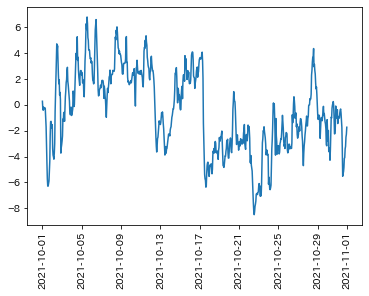

In [241]:
# トレンド＋ノイズ = 元データ - 季節成分

trend_noise =  df_weather[element] - season_year_day.values.reshape(-1)
plt.plot(trend_noise.loc[start:end])
plt.xticks(rotation=90)
plt.show()

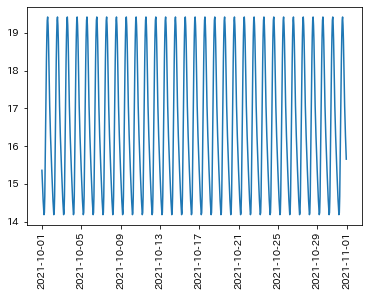

In [242]:
# (年＋日）季節成分を分解したい
# 季節成分を取り出す
# 1日周期

# 平均の計算
hour_mean = []
for hour in season_year_day.index.hour.unique():
    condition = season_year_day.index.hour == hour
    mean = season_year_day.loc[condition,"mean"].mean()
    hour_mean.append([hour,mean])
    
hour_mean = np.array(hour_mean)

# くり返して完成
season_day = pd.DataFrame(np.tile(hour_mean[:,1],days),index=df_weather.index)
plt.plot(season_day[start:end])
plt.xticks(rotation=90)
plt.show()

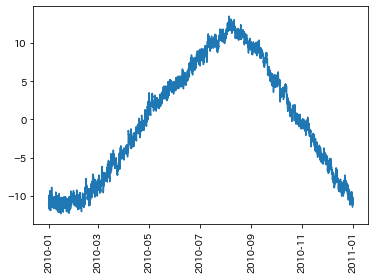

In [243]:
# 年周期 = (年+日)周期 - 日周期

season_year =  season_year_day["mean"] - season_day.values.reshape(-1)
plt.plot(season_year.loc["2010"])
plt.xticks(rotation=90)
plt.show()

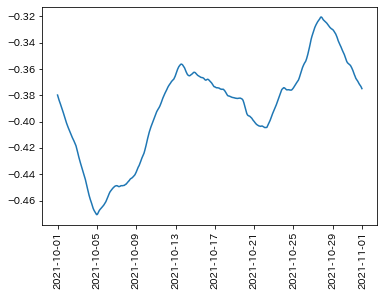

In [244]:
# トレンド
span = 24*365

trend = trend_noise.rolling(span,min_periods=24*364,center=True).mean()
plt.plot(trend[start:end])
plt.xticks(rotation=90)
plt.show()

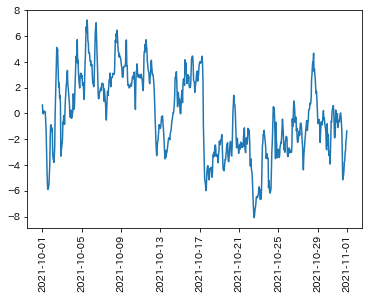

In [245]:
# ノイズ
noise = trend_noise - trend
plt.plot(noise[start:end])
plt.xticks(rotation=90)
plt.show()

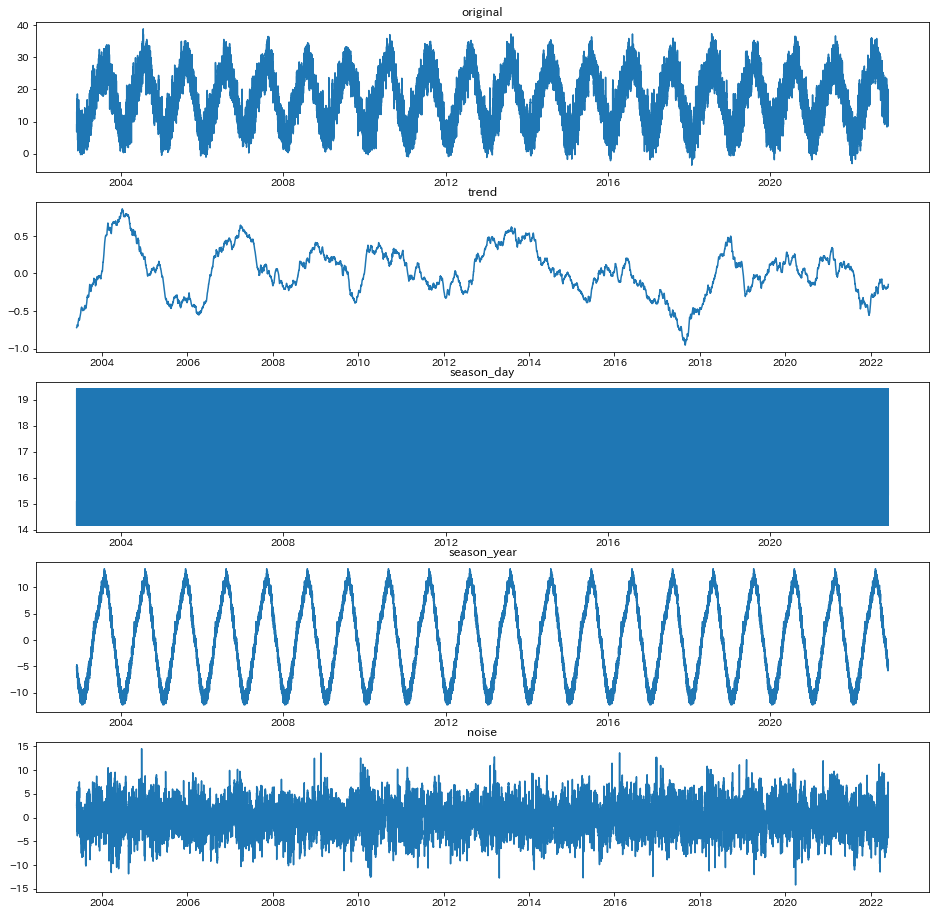

In [246]:
# 並べて表示(軸調整なし)
graph = {
    "original":df_weather[element],
    "trend":trend,
    "season_day":season_day,
    "season_year":season_year,
    "noise":noise
}

nrows = len(graph)
fig,axes = plt.subplots(nrows=nrows,ncols=1,figsize=(16,16))

for num,(key,value) in enumerate(graph.items()):
    axes[num].plot(value)
    axes[num].set_title(key)

plt.show()

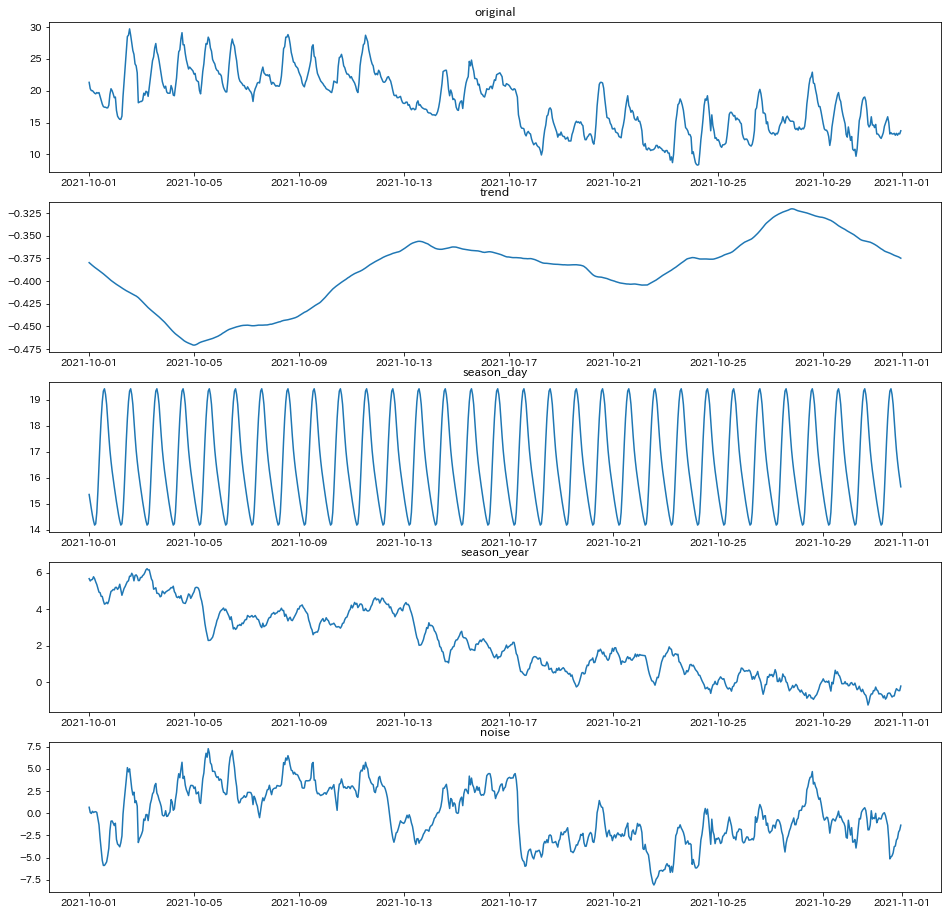

In [247]:
# 並べて表示(軸調整なし、1カ月)
graph = {
    "original":df_weather[element],
    "trend":trend,
    "season_day":season_day,
    "season_year":season_year,
    "noise":noise
}

nrows = len(graph)
fig,axes = plt.subplots(nrows=nrows,ncols=1,figsize=(16,16))

for num,(key,value) in enumerate(graph.items()):
    axes[num].plot(value[start:end])
    axes[num].set_title(key)

plt.show()

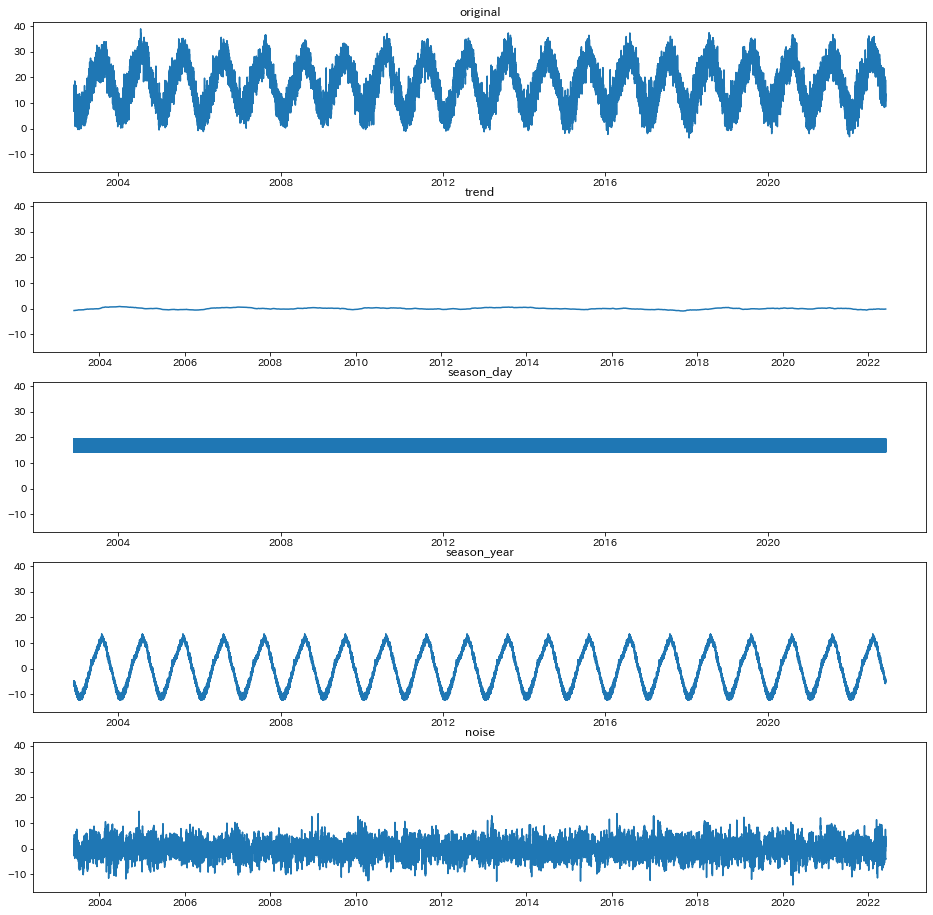

In [248]:
# 並べて表示(リアル表示)
graph = {
    "original":df_weather[element],
    "trend":trend,
    "season_day":season_day,
    "season_year":season_year,
    "noise":noise
}

nrows = len(graph)
fig,axes = plt.subplots(nrows=nrows,ncols=1,sharey="all",figsize=(16,16))

for num,(key,value) in enumerate(graph.items()):
    axes[num].plot(value)
    axes[num].set_title(key)

plt.show()

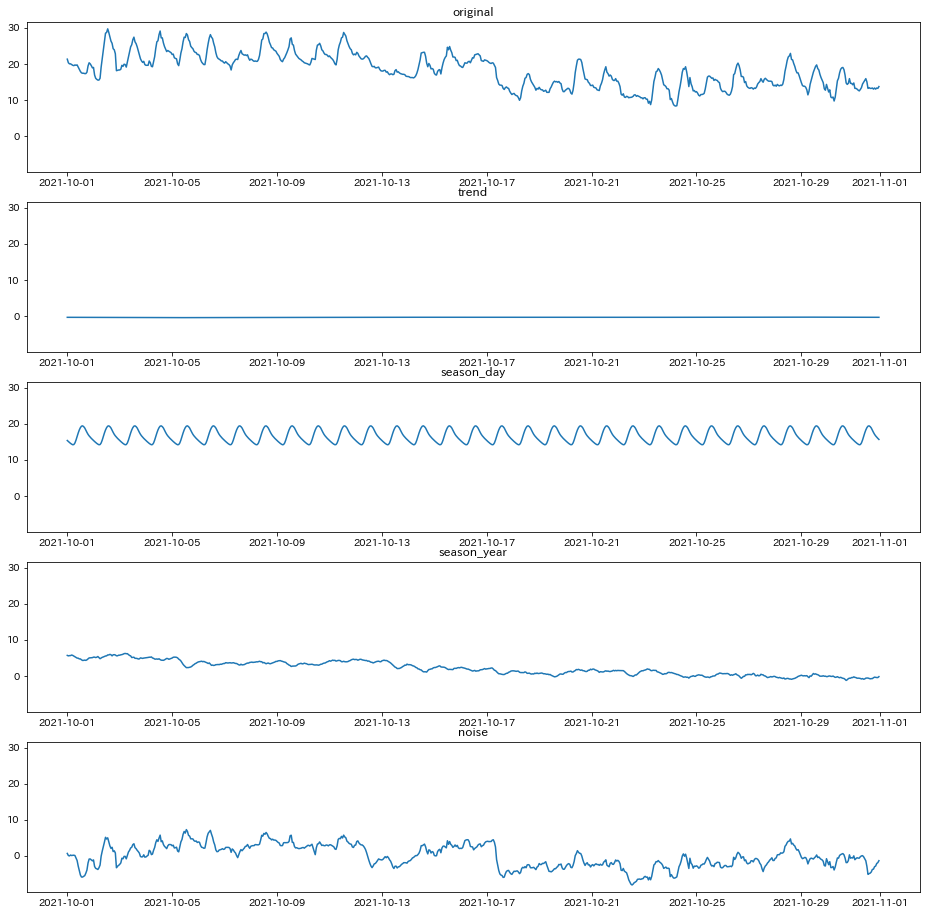

In [249]:
# 並べて表示(リアル表示、1カ月)
graph = {
    "original":df_weather[element],
    "trend":trend,
    "season_day":season_day,
    "season_year":season_year,
    "noise":noise
}

nrows = len(graph)
fig,axes = plt.subplots(nrows=nrows,ncols=1,sharey="all",figsize=(16,16))

for num,(key,value) in enumerate(graph.items()):
    axes[num].plot(value[start:end])
    axes[num].set_title(key)

plt.show()

# ARモデルで予測

In [107]:
# 参考：https://qiita.com/innovation1005/items/6c5263d79ccc67263b2c
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
name = "ar_model"

In [253]:
# period = "2015"
# data = df_weather.loc[period,element]
start = "2003"
end = "2018"
data = df_weather.loc[start:end,element]
data.index.freq = "H"

In [123]:
mod = AutoReg(data,3,old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:            temperature   No. Observations:               140256
Model:                     AutoReg(3)   Log Likelihood             -149164.791
Method:               Conditional MLE   S.D. of innovations              0.701
Date:                Fri, 09 Dec 2022   AIC                         298339.582
Time:                        11:26:49   BIC                         298388.838
Sample:                    01-01-2003   HQIC                        298354.307
                         - 12-31-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1381      0.004     32.715      0.000       0.130       0.146
temperature.L1     1.3621      0.003    520.183      0.000       1.357       1.367
temperature.L2    -0.1744      0.004

In [124]:
res = mod.fit(cov_type="HC0")
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:            temperature   No. Observations:               140256
Model:                     AutoReg(3)   Log Likelihood             -149164.791
Method:               Conditional MLE   S.D. of innovations              0.701
Date:                Fri, 09 Dec 2022   AIC                         298339.582
Time:                        11:26:53   BIC                         298388.838
Sample:                    01-01-2003   HQIC                        298354.307
                         - 12-31-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1381      0.004     32.045      0.000       0.130       0.146
temperature.L1     1.3621      0.004    310.988      0.000       1.353       1.371
temperature.L2    -0.1744      0.007

In [125]:
sel = ar_select_order(data, 13, old_names=False)
print(sel.ar_lags)
res = sel.model.fit()
print(res.summary())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
                            AutoReg Model Results                             
Dep. Variable:            temperature   No. Observations:               140256
Model:                    AutoReg(13)   Log Likelihood             -144979.769
Method:               Conditional MLE   S.D. of innovations              0.680
Date:                Fri, 09 Dec 2022   AIC                         289989.539
Time:                        11:26:55   BIC                         290137.306
Sample:                    01-01-2003   HQIC                        290033.712
                         - 12-31-2018                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0667      0.004     15.895      0.000       0.058       0.075
temperature.L1      1.3078      0.003    491.851      0.000       1.303 

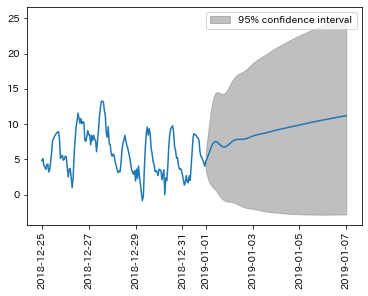

In [127]:
# ゴミ予測じゃないか
start = "2018-12-25"
end = "2019-01-07"
fig = res.plot_predict(start=start,end=end)
plt.xticks(rotation=90)
plt.show()

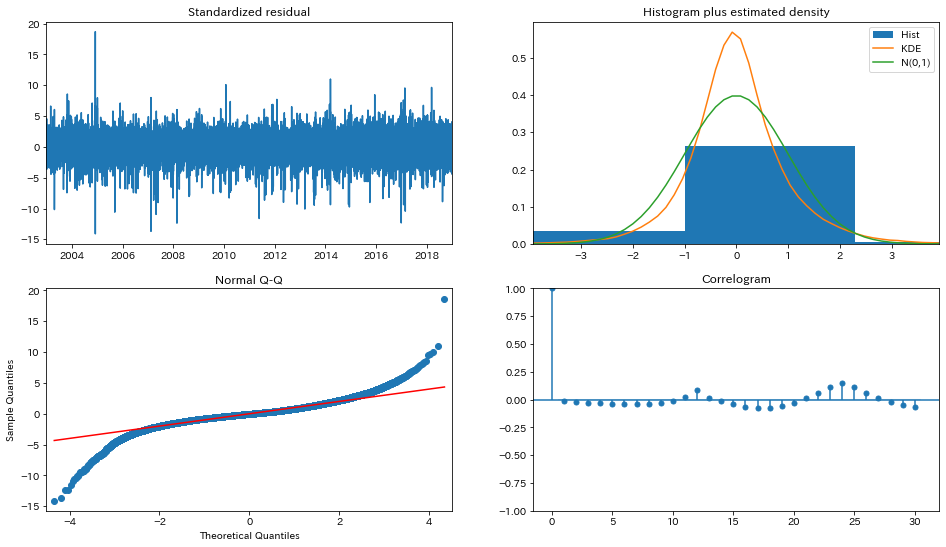

In [128]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [254]:
# 季節調整機能
sel = ar_select_order(data, 13, seasonal=True, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:            temperature   No. Observations:               140256
Model:              Seas. AutoReg(13)   Log Likelihood             -132493.699
Method:               Conditional MLE   S.D. of innovations              0.622
Date:                Fri, 09 Dec 2022   AIC                         265063.398
Time:                        12:46:28   BIC                         265437.741
Sample:                    01-01-2003   HQIC                        265175.302
                         - 12-31-2018                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2067      0.009    -21.951      0.000      -0.225      -0.188
s(2,24)            -0.0210      0.012     -1.813      0.070      -0.044       0.002
s(3,24)            -0.0344      

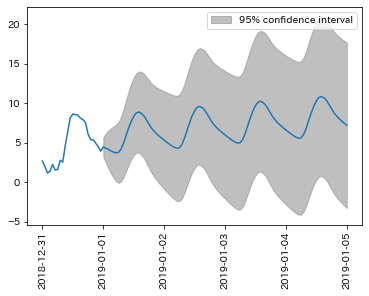

In [255]:
# まあわかるように

start = "2018-12-31"
end = "2019-01-05"
fig = res.plot_predict(start=start,end=end)
plt.xticks(rotation=90)

# file_path = f"{image_dir_path}{name}_{element}_{start}_{end}.png"
# plt.savefig(file_path)
plt.show()

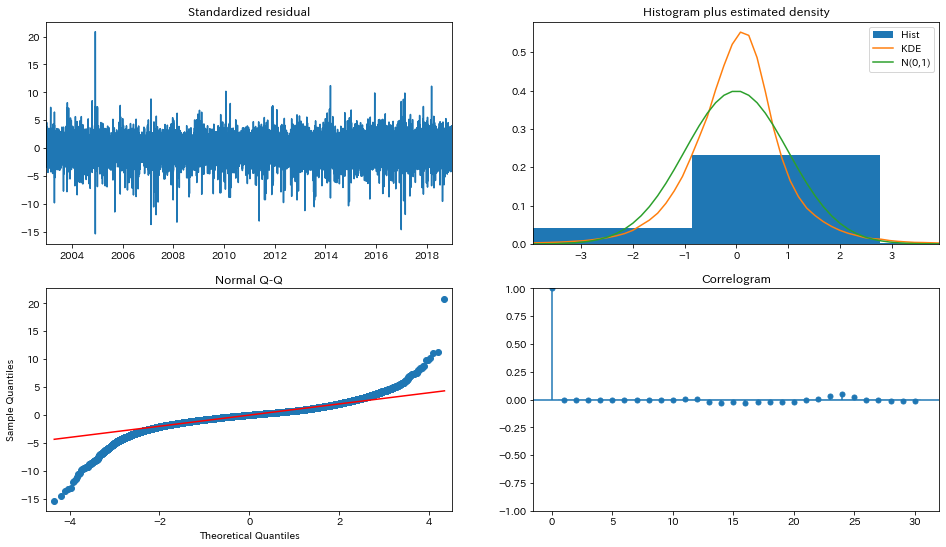

In [142]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(lags=30, fig=fig)

In [145]:
sel = ar_select_order(data, 13, old_names=False)
print(sel.ar_lags)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [168]:
# glob設定はかなり計算が重くなるぞ
# データ15年分、max_lag が10で30秒は待つ
sel = ar_select_order(data, 10, glob=True, old_names=False)
print(sel.ar_lags)
res = sel.model.fit()
print(res.summary())

[1, 2, 3, 4, 5, 6, 10]
                            AutoReg Model Results                             
Dep. Variable:            temperature   No. Observations:               140256
Model:             Restr. AutoReg(10)   Log Likelihood             -146244.429
Method:               Conditional MLE   S.D. of innovations              0.686
Date:                Fri, 09 Dec 2022   AIC                         292506.859
Time:                        11:39:02   BIC                         292595.519
Sample:                    01-01-2003   HQIC                        292533.362
                         - 12-31-2018                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0848      0.004     20.116      0.000       0.077       0.093
temperature.L1      1.3233      0.003    496.734      0.000       1.318       1.329
temperatu

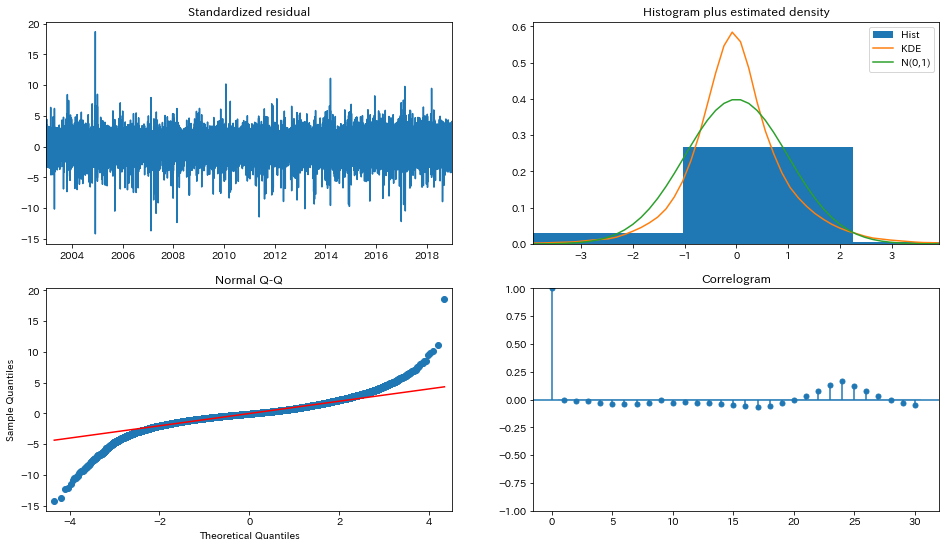

In [169]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [181]:
# seasonalを付けるとさらに待たされるぞ
# 15年分、max_lag=8で1分10秒くらい
sel = ar_select_order(data, 7, glob=True, seasonal=True, old_names=False)
print(sel.ar_lags)
res = sel.model.fit()
print(res.summary())

[1, 2, 3, 4, 6, 7]
                               AutoReg Model Results                               
Dep. Variable:                 temperature   No. Observations:               140256
Model:             Restr. Seas. AutoReg(7)   Log Likelihood             -133105.397
Method:                    Conditional MLE   S.D. of innovations              0.625
Date:                     Fri, 09 Dec 2022   AIC                         266272.793
Time:                             11:49:55   BIC                         266578.180
Sample:                         01-01-2003   HQIC                        266364.084
                              - 12-31-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1953      0.009    -21.198      0.000      -0.213      -0.177
s(2,24)            0.0163      0.012      1.405      0.160  

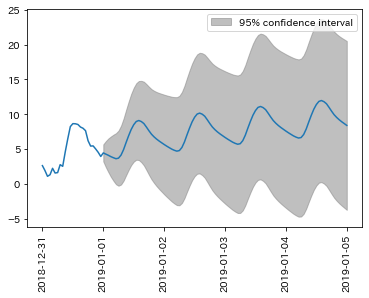

In [182]:
# まあわかるように
start = "2018-12-31"
end = "2019-01-05"
fig = res.plot_predict(start=start,end=end)
plt.xticks(rotation=90)
plt.show()

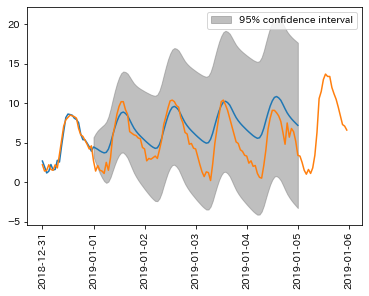

In [256]:
# 微妙精度か？
start = "2018-12-31"
end = "2019-01-05"
fig = res.plot_predict(start=start,end=end)
plt.plot(df_weather.loc[start:end,element])
plt.xticks(rotation=90)

# file_path = f"{image_dir_path}{name}_{element}_{start}_{end}_comparison.png"
# plt.savefig(file_path)
plt.show()

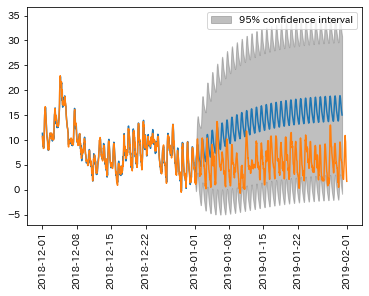

In [186]:
# 微妙精度か？
start = "2018-12-01"
end = "2019-01-31"
fig = res.plot_predict(start=start,end=end)
plt.plot(df_weather.loc[start:end,element])
plt.xticks(rotation=90)
plt.show()

In [279]:
# 階差ならどうでしょうか？

start = "2003"
end = "2018"
data = df_weather[element].diff().loc[start:end]
data.index.freq = "H"

In [280]:
# seasonalを付けるとさらに待たされるぞ
# 15年分、max_lag=8で1分10秒くらい
sel = ar_select_order(data, 7, glob=True, seasonal=True, old_names=False)
print(sel.ar_lags)
res = sel.model.fit()
print(res.summary())

[1, 2, 3, 4, 5, 6, 7]
                            AutoReg Model Results                             
Dep. Variable:            temperature   No. Observations:               140256
Model:               Seas. AutoReg(7)   Log Likelihood             -133135.776
Method:               Conditional MLE   S.D. of innovations              0.625
Date:                Fri, 09 Dec 2022   AIC                         266335.553
Time:                        13:03:17   BIC                         266650.790
Sample:                    01-01-2003   HQIC                        266429.788
                         - 12-31-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2771      0.009    -32.275      0.000      -0.294      -0.260
s(2,24)            0.0162      0.012      1.400      0.161      -0.006       0.039
s(3,24)       

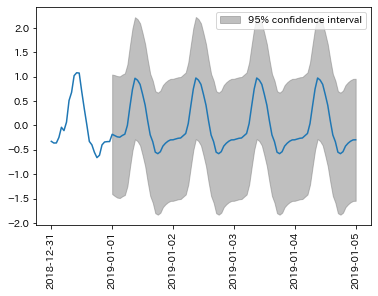

In [297]:
# まあわかるように
start = "2018-12-31"
end = "2019-01-05"
fig = res.plot_predict(start=start,end=end)
plt.xticks(rotation=90)
plt.show()

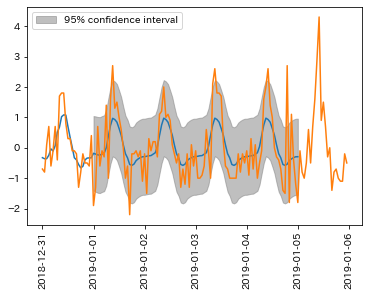

In [298]:
# まだわかる…か？
start = "2018-12-31"
end = "2019-01-05"
fig = res.plot_predict(start=start,end=end)
plt.plot(df_weather[element].diff().loc[start:end])
plt.xticks(rotation=90)

# file_path = f"{image_dir_path}{name}_{element}_diff_{start}_{end}_comparison.png"
# plt.savefig(file_path)
plt.show()

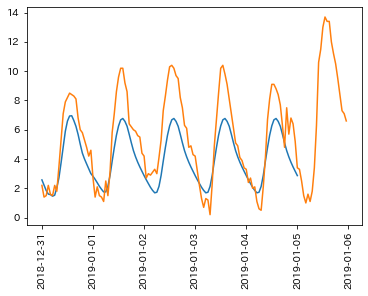

In [303]:
# 階差から戻すと…？
pred = res.predict(start=start,end=end)
plt.plot(pred.cumsum() + df_weather.loc["2018-12-30 23:00:00",element])
plt.plot(df_weather.loc[start:end,element])
plt.xticks(rotation=90)

file_path = f"{image_dir_path}{name}_{element}_diff_invrese_{start}_{end}_comparison.png"
plt.savefig(file_path)
plt.show()

In [287]:
df_weather.loc[start:end,element]

datetime
2018-12-01 00:00:00    10.7
2018-12-01 01:00:00     9.9
2018-12-01 02:00:00     9.2
2018-12-01 03:00:00     8.9
2018-12-01 04:00:00     8.9
                       ... 
2019-01-31 19:00:00     5.7
2019-01-31 20:00:00     4.3
2019-01-31 21:00:00     3.3
2019-01-31 22:00:00     2.1
2019-01-31 23:00:00     1.7
Name: temperature, Length: 1488, dtype: float64

In [288]:
df_weather.loc["2018-12-30 23:00:00",element]

2.9

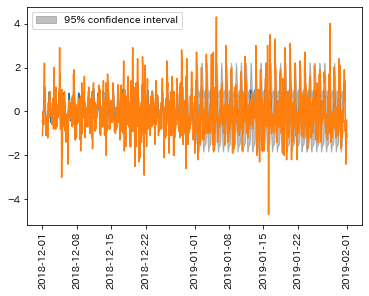

In [284]:
# 微妙精度か？
start = "2018-12-01"
end = "2019-01-31"
fig = res.plot_predict(start=start,end=end)
plt.plot(df_weather[element].diff().loc[start:end])
plt.xticks(rotation=90)
plt.show()